# **TABLE OF CONTENTS**



1.   Business Problem
2. Data description
3. Data loading and Pre-processing
3. Exploratory Data Analysis
  * Descriptive analysis - What's working, what's not working  
  * Prescriptive analysis - How to Target High-Quality Lead Generation and Revenue Conversion
  * Comparison of campaign performances
4. Hypothesis testing
6.   Regression Analysis - to predict campaign metrics and performance over time
5.   Insights &  Recommendations
7. Conclusion






#**1. Business Problem**
As an operating system software development organization, our primary objective for this business case is to assess performance of our 4 different marketing campaigns, to understand how to best market the product, which is a Robot Operating System in this case.

This analysis will help us understand-

1. What's working, what's not working?
2. How to ensure these campaigns reach high quality leads which we can ultimately convert to revenue?
3. What other data would be needed to further the analysis?

To decompose the problem further-

**1. What's Working, What's Not?**

  * Traffic Analysis: Analyze page views and bounce rates from the Exercise - pages dataset. Higher page views with lower bounce rates may indicate effective campaigns.

  * Engagement Analysis: Look at page_avg_time to determine how engaging the content is. A higher average time on page suggests the audience finds the content valuable.

  * Conversion Analysis: From the Exercise - leads dataset, assess the conversion rate by comparing the number of leads generated from each campaign with their status (lead_status). Campaigns with higher conversion rates are performing better.


**2. High-Quality Lead Generation and Revenue Conversion:**

  * Lead Quality Analysis: Segment leads by job title, industry, and country to identify which segments are more likely to convert. Campaigns targeting these segments should be prioritized.
  
  * Source Effectiveness: Evaluate lead_source to identify which channels are driving the most conversions. Focus marketing spend on the highest-performing sources.
  
  * Content Optimization: Based on the average time spent on pages, adjust the content to enhance engagement. For pages with high bounce rates and low time on page, consider revising the content to better match user expectations.

**3. Identifying Additional Data Needs:**

  * Lead Scoring Data: Introduce a lead scoring mechanism to rank leads based on their likelihood to convert. This could include factors such as engagement history, job title seniority, company size, etc.
  
  * Customer Lifetime Value (CLV): Data on the estimated CLV of leads would help prioritize campaigns targeting high-value customers.
  
  * Competitive Data: Information about competitor campaigns, their traffic, and lead generation strategies could provide valuable benchmarks.







In [1]:
# Importing all necessary Libraries

#data analysis libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#machine learning modelling libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#decompsose library to perform time-series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

#coint to understand co-intergration or correlation between different variable, mostly used in Causal Analysis
from statsmodels.tsa.stattools import coint

#to import any warnings
import warnings
warnings.filterwarnings('ignore')

#**2. Data Description**

For this case study, total 3 datasets have been provided, with information about 4 different types of marketing campaigns for marketing a Robot operating system or 'ROS' by the open-source software development organization.

The 3 datasets contain information in the form of total Campaigns, Pages and Leads, about these 4 distinct marketing campaigns.

  * Each row of the Campaigns dataset corresponds to the type of the Campaign name out 4 types, and its url.

  * Each row of the Pages dataset corresponds to the campaign page related information for a specific date.

  * Each row of the Leads dataset corresponds to more lead-specific information with respect to the date on which the lead engaged with a given campaign.


Each of these datasets have differnt number of records.

Below is an overview of all the 3 Datasets:

1. 'Exercise - campaigns': Contains campaign names and URLs.
2. 'Exercise - pages': Contains page metrics such as views, average time on page, and bounce rates.
3. 'Exercise - leads': Contains information about leads, including their job title, industry, country, the campaign they joined, and their status.

#**3. Data Loading and Preprocessing**

In [2]:
campaigns = pd.read_csv('Exercise data - campaigns.csv')
campaigns.head()

,campaign_name,page_url
0,2) FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice
1,2)CY20_IOT_Robotics_Whitepaper_ROSonrobotics,ubuntu.com/engage/securing-ros-on-robotics-pla...
2,2)CY21_IOT_Robotics_T1_WP_ROSDocker,ubuntu.com/engage/dockerandros
3,2)CY21_IOT_Robotics_Whitepaper_ROSESM,ubuntu.com/engage/ros-support


We can see that the campaign names contains a '2)' in the start. We will get rid of it.

In [3]:
#Remove the '2)' or '2) ' wherever needed from the beginning of the campaign name
campaigns['campaign_name'] = campaigns['campaign_name'].str.replace(r'^\d+\)\s*', '', regex=True)
campaigns.head()

,campaign_name,page_url
0,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,ubuntu.com/engage/securing-ros-on-robotics-pla...
2,CY21_IOT_Robotics_T1_WP_ROSDocker,ubuntu.com/engage/dockerandros
3,CY21_IOT_Robotics_Whitepaper_ROSESM,ubuntu.com/engage/ros-support


Now we will take a look at the Pages dataset.

In [4]:
pages = pd.read_csv('Exercise data - pages.csv')
pages.head()

,page_url,date,page_views,page_avg_time,page_bounce_rate
0,ubuntu.com/engage/dockerandros,20211216.0,"3,853",0:01:00,86.98%
1,ubuntu.com/engage/dockerandros,20211214.0,"3,179",0:00:55,86.65%
2,ubuntu.com/engage/dockerandros,20211207.0,"2,843",0:01:05,87.57%
3,ubuntu.com/engage/dockerandros,20211212.0,"2,777",0:01:04,87.88%
4,ubuntu.com/engage/dockerandros,20211217.0,"2,570",0:00:56,86.42%


It can be seen that the values in the 'date' column is not captured correctly. Therefore we will convert the data type of the date columns to correctly capture the Year, Month and Date value.

In [5]:
pages['date'].dtype

dtype('float64')

In [6]:
# Convert the 'date' column from string (YYYYMMDD) to datetime format (YYYY-MM-DD)
pages['date'] = pd.to_datetime(pages['date'], format='%Y%m%d')

In [7]:
pages['date'].dtype

dtype('<M8[ns]')

In [8]:
print(pages['date'])

0     2021-12-16
1     2021-12-14
2     2021-12-07
3     2021-12-12
4     2021-12-17
         ...    
786   2021-12-03
787   2021-12-09
788   2021-12-12
789   2021-12-13
790          NaT
Name: date, Length: 791, dtype: datetime64[ns]


In [9]:
#clear '%' from the page_bounce_rate columns and remove ',' from the page_views column
pages['page_bounce_rate'] = pages['page_bounce_rate'].str.replace('%', '')
pages['page_views'] = pages['page_views'].str.replace(',', '')
pages.head()

,page_url,date,page_views,page_avg_time,page_bounce_rate
0,ubuntu.com/engage/dockerandros,2021-12-16,3853,0:01:00,86.98
1,ubuntu.com/engage/dockerandros,2021-12-14,3179,0:00:55,86.65
2,ubuntu.com/engage/dockerandros,2021-12-07,2843,0:01:05,87.57
3,ubuntu.com/engage/dockerandros,2021-12-12,2777,0:01:04,87.88
4,ubuntu.com/engage/dockerandros,2021-12-17,2570,0:00:56,86.42


In [10]:
pages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   page_url          790 non-null    object        
 1   date              790 non-null    datetime64[ns]
 2   page_views        791 non-null    object        
 3   page_avg_time     791 non-null    object        
 4   page_bounce_rate  791 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 31.0+ KB


We can see that the numeric columns page_view and page_bounce_rate is an object time. We will convert those into appropriate data types.

In [11]:
#Convert page_views and page_bounce_rate into float data type
pages['page_views'] = pages['page_views'].astype(float)
pages['page_bounce_rate'] = pages['page_bounce_rate'].astype(float)
pages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   page_url          790 non-null    object        
 1   date              790 non-null    datetime64[ns]
 2   page_views        791 non-null    float64       
 3   page_avg_time     791 non-null    object        
 4   page_bounce_rate  791 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 31.0+ KB


We will also convert the page_avg_time into a timedelta column so that we can carry out various time calculations on this column.

In [12]:
#convert page_avg_time into timedelta data type
pages['page_avg_time'] = pd.to_timedelta(pages['page_avg_time'])
pages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   page_url          790 non-null    object         
 1   date              790 non-null    datetime64[ns] 
 2   page_views        791 non-null    float64        
 3   page_avg_time     791 non-null    timedelta64[ns]
 4   page_bounce_rate  791 non-null    float64        
dtypes: datetime64[ns](1), float64(2), object(1), timedelta64[ns](1)
memory usage: 31.0+ KB


In [13]:
pages.head()

,page_url,date,page_views,page_avg_time,page_bounce_rate
0,ubuntu.com/engage/dockerandros,2021-12-16,3853.0,0 days 00:01:00,86.98
1,ubuntu.com/engage/dockerandros,2021-12-14,3179.0,0 days 00:00:55,86.65
2,ubuntu.com/engage/dockerandros,2021-12-07,2843.0,0 days 00:01:05,87.57
3,ubuntu.com/engage/dockerandros,2021-12-12,2777.0,0 days 00:01:04,87.88
4,ubuntu.com/engage/dockerandros,2021-12-17,2570.0,0 days 00:00:56,86.42


In [14]:
#check missing values
pages.isnull().sum()

,0
page_url,1
date,1
page_views,0
page_avg_time,0
page_bounce_rate,0


In [15]:
#we will remove the record with one missing date value
pages = pages.dropna()
pages.isnull().sum()

,0
page_url,0
date,0
page_views,0
page_avg_time,0
page_bounce_rate,0


In [16]:
pages['page_avg_time'].mean()

Timedelta('0 days 00:01:28.597468354')

In [17]:
pages['page_views'].sum()

50410.0

**We can see that the average time that a user spends on a page viewing it is 1 minutes 28 seconds approximately.**

Now we will proceed with similar analyses for the Leads dataset.

In [18]:
leads = pd.read_csv('Exercise data - leads.csv')
leads.head()

,lead_hashed_id,campaign_joined_date,lead_job_title,lead_industry,lead_country,campaign_name,lead_source,lead_status
0,011c1b8f66f416ed05e466117839bc82,2021-12-08,Student,NaN,DE,2) FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
1,0214109a8d2ea5665e250426e666d745,2021-06-10,SE,NaN,BE,2) FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
2,02b78453c1a350f85dce07e6d1d135b5,2021-09-22,engineer,NaN,BD,2) FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Nurture
3,03f08c9e402a968fbad2ef8b6df881b3,2021-07-22,Professor,NaN,US,2) FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
4,04e1a8cbf3cf2f13a1d2ae1177dd5b45,2021-07-12,Student,NaN,IT,2) FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified


We can see that the Leads dataset too has the '2) in its campaign names, as it references the campaign names from the Campaigns dataset. We will remove it just like we did for Campaigns dataframe.

In [19]:
#Remove the '2)' or '2) ' wherever needed from the beginning of the campaign_name in Leads dataframe
leads['campaign_name'] = leads['campaign_name'].str.replace(r'^\d+\)\s*', '', regex=True)
leads.head()

,lead_hashed_id,campaign_joined_date,lead_job_title,lead_industry,lead_country,campaign_name,lead_source,lead_status
0,011c1b8f66f416ed05e466117839bc82,2021-12-08,Student,NaN,DE,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
1,0214109a8d2ea5665e250426e666d745,2021-06-10,SE,NaN,BE,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
2,02b78453c1a350f85dce07e6d1d135b5,2021-09-22,engineer,NaN,BD,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Nurture
3,03f08c9e402a968fbad2ef8b6df881b3,2021-07-22,Professor,NaN,US,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
4,04e1a8cbf3cf2f13a1d2ae1177dd5b45,2021-07-12,Student,NaN,IT,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified


In [20]:
leads.head()

,lead_hashed_id,campaign_joined_date,lead_job_title,lead_industry,lead_country,campaign_name,lead_source,lead_status
0,011c1b8f66f416ed05e466117839bc82,2021-12-08,Student,NaN,DE,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
1,0214109a8d2ea5665e250426e666d745,2021-06-10,SE,NaN,BE,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
2,02b78453c1a350f85dce07e6d1d135b5,2021-09-22,engineer,NaN,BD,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Nurture
3,03f08c9e402a968fbad2ef8b6df881b3,2021-07-22,Professor,NaN,US,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified
4,04e1a8cbf3cf2f13a1d2ae1177dd5b45,2021-07-12,Student,NaN,IT,FY19_IOT_Robotics_Whitepaper_OSconsiderations,NaN,Disqualified


Below code will check the leads by campaign names.

In [21]:
#missing value pecentage in Leads
((leads.isna().sum()/len(leads))*100).sort_values(ascending=False).reset_index(name='Missing Values %')

,index,Missing Values %
0,lead_industry,84.488189
1,lead_source,25.196850
2,lead_country,10.354331
3,lead_job_title,1.299213
4,lead_hashed_id,0.000000
5,campaign_joined_date,0.000000
6,campaign_name,0.000000
7,lead_status,0.000000


**There are 2 ways to go about dealing with the missing values in the Lead_industry here-**

1. We can get rid of the column lead_industry as more than 80% missing data contributes little to nothing to tell us about its importance in the further analysis.

OR

2. We can go by the business context and domain expertise knowledge. Its important to note here that this is a research analysis to test the effectiveness of the marketing campaign for a Robot Operating System. So there's a very high likelihood that the industry that the lead has come from is a software development industry in a broader sense, as, if a company or a person is looking for an ROS, most likely they want to use one in their product, so there's a high chance that they are very likely a Software Development company. This assumption would also be very much in line with the data we have, which shows that the category 'Software Development' is the most frequent industry with 11139 count of leads. So it might be a good idea to replace the missing value in the Lead_industry column with the value 'Software Development'.

Having said that, that would still be an assumption. Besides, there are so many companies including healthcare and automotive who make use of Robotic applications in their operations, so tagging them into 'Software Development' could mean essentially they are primarily software companies when they aren't. So to avoid the risk of unknown bias, we will simply go ahead and drop the column 'lead_industry' from the merged dataframe.

In [22]:
leads['lead_industry'].value_counts()

,count
lead_industry,
Software Development,73
Information Technology,57
Education & Training,46
Manufacturer - Other,24
Other,20
Manufacturer - Computer Hardware,18
Telecommunications,17
Automotive,16
Retail & e-commerce,12


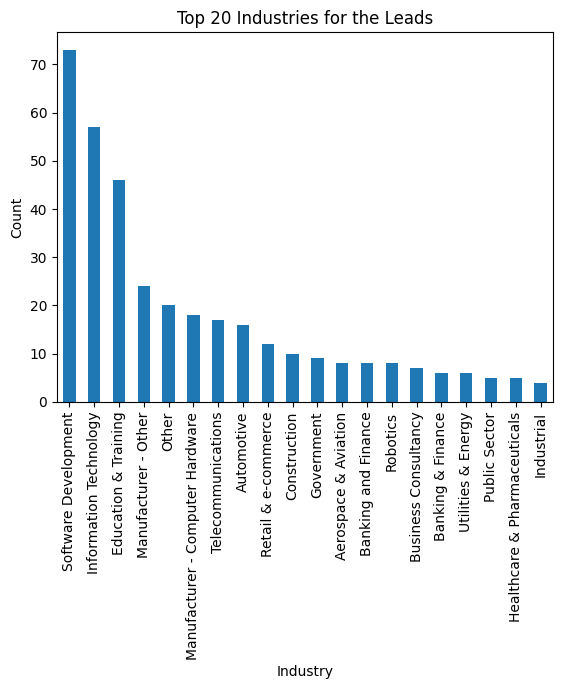

In [23]:
#show a plot to show the distribution of the top 10 lead_industry
leads['lead_industry'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Industries for the Leads')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

We will now remove the leads_industry from the dataset as it has more than 80% missing data.

In [24]:
#remove columns lead_industry from leads dataset
leads = leads.drop(['lead_industry'], axis=1)

In [25]:
#remove columns with null values in lead_job_title from leads dataset
leads = leads.dropna(subset=['lead_job_title'])

In [26]:
#fill NaN values in columns lead_country and lead_source with word 'Unknown'
leads['lead_country'] = leads['lead_country'].fillna('Unknown')
leads['lead_source'] = leads['lead_source'].fillna('Unknown')

In [27]:
#missing value pecentage in Leads
((leads.isna().sum()/len(leads))*100).sort_values(ascending=False).reset_index(name='Missing Values %')

,index,Missing Values %
0,lead_hashed_id,0.0
1,campaign_joined_date,0.0
2,lead_job_title,0.0
3,lead_country,0.0
4,campaign_name,0.0
5,lead_source,0.0
6,lead_status,0.0


In [28]:
leads.shape

(2507, 7)

In [29]:
#1. How many users or leads joined each campaign?
leads.groupby('campaign_name')['lead_hashed_id'].count().sort_values(ascending=False)

,lead_hashed_id
campaign_name,
CY21_IOT_Robotics_T1_WP_ROSDocker,1539
CY21_IOT_Robotics_Whitepaper_ROSESM,495
FY19_IOT_Robotics_Whitepaper_OSconsiderations,242
CY20_IOT_Robotics_Whitepaper_ROSonrobotics,231


### **I. Data Integration and Preparation**

Now we are ready to move forward with Data analysis. As part of the analysis, we will merge the 3 datasets, to obtain a comprehensive view of the entire dataset information with respect to how all the campaigns did in terms of Page views, bounce rates, and how many of these got converted to leads.



In [30]:
# Merge campaigns with pages using 'page_url'
campaign_page_data = pd.merge(campaigns, pages, on='page_url', how='inner')



In [31]:
campaign_page_data.shape

(790, 6)

In [32]:
# Drop any duplicate rows in the merged dataset
campaign_page_data = campaign_page_data.drop_duplicates()

In [33]:
campaign_page_data.shape

(790, 6)

In [34]:
campaign_page_data.head()

,campaign_name,page_url,date,page_views,page_avg_time,page_bounce_rate
0,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-04-21,53.0,0 days 00:01:42,84.00
1,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-05-19,46.0,0 days 00:00:55,97.37
2,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-03-24,42.0,0 days 00:01:52,85.71
3,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-09-09,37.0,0 days 00:00:19,96.43
4,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-01-26,35.0,0 days 00:02:24,81.82


In [35]:
#Page bounce rate for each campaign
campaign_page_data.groupby('campaign_name')['page_bounce_rate'].mean().sort_values(ascending=False)

,page_bounce_rate
campaign_name,
CY21_IOT_Robotics_T1_WP_ROSDocker,78.965500
CY20_IOT_Robotics_Whitepaper_ROSonrobotics,59.327898
FY19_IOT_Robotics_Whitepaper_OSconsiderations,51.219058
CY21_IOT_Robotics_Whitepaper_ROSESM,49.142925


In [36]:
#Overall page_bounce_rate
(campaign_page_data.groupby('campaign_name')\
 ['page_bounce_rate'].mean()\
 .sort_values(ascending=False)).mean()

59.6638454791778

In [37]:
#change the name 'date' to 'page_view_date' in campaign_page_data dataframe
campaign_page_data = campaign_page_data.rename(columns={'date': 'page_view_date'})
campaign_page_data.head()

,campaign_name,page_url,page_view_date,page_views,page_avg_time,page_bounce_rate
0,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-04-21,53.0,0 days 00:01:42,84.00
1,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-05-19,46.0,0 days 00:00:55,97.37
2,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-03-24,42.0,0 days 00:01:52,85.71
3,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-09-09,37.0,0 days 00:00:19,96.43
4,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-01-26,35.0,0 days 00:02:24,81.82


In [38]:
campaign_page_data.shape

(790, 6)

So now we have all the page views, average view time, and bounce rate information with respect to the campaign name, as shown in above output.

In [39]:
#check the data basic information about no of rows, columns and datatypes
campaign_page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   campaign_name     790 non-null    object         
 1   page_url          790 non-null    object         
 2   page_view_date    790 non-null    datetime64[ns] 
 3   page_views        790 non-null    float64        
 4   page_avg_time     790 non-null    timedelta64[ns]
 5   page_bounce_rate  790 non-null    float64        
dtypes: datetime64[ns](1), float64(2), object(2), timedelta64[ns](1)
memory usage: 37.2+ KB


In [40]:
campaign_page_data['page_views'].sum()

50410.0

In [41]:
#missing value pecentage in merged data
((campaign_page_data.isna().sum()/len(leads))*100).sort_values(ascending=False).reset_index(name='Missing Values %')

,index,Missing Values %
0,campaign_name,0.0
1,page_url,0.0
2,page_view_date,0.0
3,page_views,0.0
4,page_avg_time,0.0
5,page_bounce_rate,0.0


In [42]:
campaign_page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   campaign_name     790 non-null    object         
 1   page_url          790 non-null    object         
 2   page_view_date    790 non-null    datetime64[ns] 
 3   page_views        790 non-null    float64        
 4   page_avg_time     790 non-null    timedelta64[ns]
 5   page_bounce_rate  790 non-null    float64        
dtypes: datetime64[ns](1), float64(2), object(2), timedelta64[ns](1)
memory usage: 37.2+ KB


In [43]:
#add a column called 'total page views' to campaign_page_data
campaign_page_data.groupby('campaign_name')['page_views'].sum().sort_values(ascending=False).reset_index(name='total_page_views')

,campaign_name,total_page_views
0,CY21_IOT_Robotics_T1_WP_ROSDocker,37122.0
1,CY21_IOT_Robotics_Whitepaper_ROSESM,9630.0
2,FY19_IOT_Robotics_Whitepaper_OSconsiderations,2048.0
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0


In [44]:
campaign_page_data_copy = campaign_page_data.copy()

**If we merge directly with leads, this will cause duplication of values on the page columns. So we will aggregate values prior to final merge of the 3 datasets.**

In [45]:
# Step 1: Create a range of dates for each campaign_name
campaign_page_data['view_date_range'] = campaign_page_data.groupby('campaign_name')['page_view_date'].transform(lambda x: f"{x.min()} to {x.max()}")


# Step 2: Aggregate campaign_page_data by campaign_name
aggregated_page_data = campaign_page_data.groupby('campaign_name').agg({
    'page_views': 'sum',  # or 'mean' if you want the average
    'page_avg_time': 'mean',  # average time spent per page view
    'page_bounce_rate': 'mean',  # average bounce rate
    'view_date_range': 'first'  # date_range is the same for each group
}).reset_index()

In [46]:
campaign_page_data.head()

,campaign_name,page_url,page_view_date,page_views,page_avg_time,page_bounce_rate,view_date_range
0,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-04-21,53.0,0 days 00:01:42,84.00,2021-01-01 00:00:00 to 2021-12-31 00:00:00
1,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-05-19,46.0,0 days 00:00:55,97.37,2021-01-01 00:00:00 to 2021-12-31 00:00:00
2,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-03-24,42.0,0 days 00:01:52,85.71,2021-01-01 00:00:00 to 2021-12-31 00:00:00
3,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-09-09,37.0,0 days 00:00:19,96.43,2021-01-01 00:00:00 to 2021-12-31 00:00:00
4,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-01-26,35.0,0 days 00:02:24,81.82,2021-01-01 00:00:00 to 2021-12-31 00:00:00


In [47]:
aggregated_page_data

,campaign_name,page_views,page_avg_time,page_bounce_rate,view_date_range
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00
1,CY21_IOT_Robotics_T1_WP_ROSDocker,37122.0,0 days 00:01:13.875000,78.965500,2021-11-22 00:00:00 to 2021-12-31 00:00:00
2,CY21_IOT_Robotics_Whitepaper_ROSESM,9630.0,0 days 00:01:27.571428571,49.142925,2021-07-05 00:00:00 to 2021-12-27 00:00:00
3,FY19_IOT_Robotics_Whitepaper_OSconsiderations,2048.0,0 days 00:01:08.165584415,51.219058,2021-01-01 00:00:00 to 2021-12-31 00:00:00


In [48]:
aggregated_page_data.dtypes

,0
campaign_name,object
page_views,float64
page_avg_time,timedelta64[ns]
page_bounce_rate,float64
view_date_range,object


In [49]:
campaign_page_data.dtypes

,0
campaign_name,object
page_url,object
page_view_date,datetime64[ns]
page_views,float64
page_avg_time,timedelta64[ns]
page_bounce_rate,float64
view_date_range,object


In [50]:
#rename the column page_views to avg_page_views
aggregated_page_data = aggregated_page_data.rename(columns={'page_views': 'total_page_views'})
aggregated_page_data.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00
1,CY21_IOT_Robotics_T1_WP_ROSDocker,37122.0,0 days 00:01:13.875000,78.965500,2021-11-22 00:00:00 to 2021-12-31 00:00:00
2,CY21_IOT_Robotics_Whitepaper_ROSESM,9630.0,0 days 00:01:27.571428571,49.142925,2021-07-05 00:00:00 to 2021-12-27 00:00:00
3,FY19_IOT_Robotics_Whitepaper_OSconsiderations,2048.0,0 days 00:01:08.165584415,51.219058,2021-01-01 00:00:00 to 2021-12-31 00:00:00


In [51]:
#add a column called 'avg_page_views' as an average of total_page_views for each campaign in the aggregated dataframe
aggregated_page_data['page_avg_views'] = aggregated_page_data['total_page_views'] / 4
aggregated_page_data.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5
1,CY21_IOT_Robotics_T1_WP_ROSDocker,37122.0,0 days 00:01:13.875000,78.965500,2021-11-22 00:00:00 to 2021-12-31 00:00:00,9280.5
2,CY21_IOT_Robotics_Whitepaper_ROSESM,9630.0,0 days 00:01:27.571428571,49.142925,2021-07-05 00:00:00 to 2021-12-27 00:00:00,2407.5
3,FY19_IOT_Robotics_Whitepaper_OSconsiderations,2048.0,0 days 00:01:08.165584415,51.219058,2021-01-01 00:00:00 to 2021-12-31 00:00:00,512.0


In [52]:
# Step 2: Merge the aggregated data with leads
marketing_campaigns_merged_df = pd.merge(aggregated_page_data, leads, on='campaign_name', how='inner')


In [53]:
marketing_campaigns_merged_df.shape

(2507, 12)

In [54]:
marketing_campaigns_merged_df.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,011d81f41ca0782ce315113a0d19c2a8,2021-06-21,Robotics CTO,TH,Unknown,New
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0193358a56bbe0fd30cd7e5387dc3918,2021-07-27,GM,CA,Twitter organic,Nurture
2,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,056923bbe29e6d82deb464cf8605c452,2021-01-30,Professor,US,Facebook organic,New
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,057c35e1619335c7c35bee1e4f3e1703,2021-03-09,ML,CA,Twitter organic,Nurture
4,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,08ad2a317e6e47c5694d865a7b1f122e,2021-05-20,Developer,NO,LinkedIn organic,Disqualified


In [55]:
marketing_campaigns_merged_df.groupby('campaign_name')['lead_hashed_id'].count().sort_values(ascending=False)

,lead_hashed_id
campaign_name,
CY21_IOT_Robotics_T1_WP_ROSDocker,1539
CY21_IOT_Robotics_Whitepaper_ROSESM,495
FY19_IOT_Robotics_Whitepaper_OSconsiderations,242
CY20_IOT_Robotics_Whitepaper_ROSonrobotics,231


## **Missing value analysis**

Because we dealt with the missing values in each of the individual datasets pages and leads separately previously, we shouldn't see any missing values as outcome of below code in the merged dataset. If we do see any, that would mean the merging has introduced it.

In [56]:
(marketing_campaigns_merged_df.isna().sum()/len(marketing_campaigns_merged_df)*100).reset_index(name='Missing Values %')

,index,Missing Values %
0,campaign_name,0.0
1,total_page_views,0.0
2,page_avg_time,0.0
3,page_bounce_rate,0.0
4,view_date_range,0.0
5,page_avg_views,0.0
6,lead_hashed_id,0.0
7,campaign_joined_date,0.0
8,lead_job_title,0.0
9,lead_country,0.0


There are no missing values in the merged dataset as expected, so we are good to proceed with rest of the analysis.

In [57]:
marketing_campaigns_merged_df.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,011d81f41ca0782ce315113a0d19c2a8,2021-06-21,Robotics CTO,TH,Unknown,New
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0193358a56bbe0fd30cd7e5387dc3918,2021-07-27,GM,CA,Twitter organic,Nurture
2,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,056923bbe29e6d82deb464cf8605c452,2021-01-30,Professor,US,Facebook organic,New
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,057c35e1619335c7c35bee1e4f3e1703,2021-03-09,ML,CA,Twitter organic,Nurture
4,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,08ad2a317e6e47c5694d865a7b1f122e,2021-05-20,Developer,NO,LinkedIn organic,Disqualified


In [58]:
#take another quick backup of the marketing_campaigns_merged_df
marketing_campaigns_merged_df_2 = marketing_campaigns_merged_df.copy()

# **4. Exploratory Data Analysis**

Some EDA research Questions w.r.t. the merged dataset -

1. How many users or leads joined each campaign?
2. How many foreign language texts in the dataset?
3. How many leads from each source for each campaign?
4. Any trends between weekdays, month?
5. Any correlation between pages viewed and leads conversion?
6. Any seasonality trends?

In [59]:
##calculate the percentage of all the non-english values in the lead_job_title columns in marketing_campaigns_merged_df dataset
non_english_percentage = (marketing_campaigns_merged_df['lead_job_title'].\
                          str.contains('[^\x00-\x7F]').\
                          sum() / len(marketing_campaigns_merged_df)) \
                          * 100
non_english_percentage

9.174311926605505

As part of exploratory data analysis, we will try and evaluate some business questions as follows-  


1. Out of total unique statuses for the column lead_status, which all lead_statuses account to a lead being referred to as a 'conversion' ('MQL', 'SQL', 'Opportunity', etc)?

2. How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

3. Do more page views or clicks really lead to more conversions?

4. Which marketing campaign is more effective in terms of conversions clicks, and overall cost-effectiveness?

5. How many possible conversions did each lead_source category contribute?

In [60]:
marketing_campaigns_merged_df.shape

(2507, 12)

In [61]:
# descriptive stats of the campaigns
marketing_campaigns_merged_df.describe()

,total_page_views,page_avg_time,page_bounce_rate,page_avg_views
count,2507.000000,2507,2507.000000,2507.000000
mean,25035.952932,0 days 00:01:19.581398935,68.589314,6258.988233
std,15433.889857,0 days 00:00:12.029158617,13.336435,3858.472464
min,1610.000000,0 days 00:01:08.165584415,49.142925,402.500000
25%,9630.000000,0 days 00:01:13.875000,51.219058,2407.500000
50%,37122.000000,0 days 00:01:13.875000,78.965500,9280.500000
75%,37122.000000,0 days 00:01:27.571428571,78.965500,9280.500000
max,37122.000000,0 days 00:01:52.437288135,78.965500,9280.500000


The descriptive statistics shown in the output provide a summary of the key metrics for the marketing campaigns in the merged dataset:

1. **Total Page Views (`total_page_views`)**:
   - **Count**: There are 2,507 campaigns in the dataset.
   - **Mean**: On average, each campaign had about 25,034 page views.
   - **Standard Deviation (std)**: The page views vary by around 15,434 across campaigns.
   - **Minimum (min)**: The campaign with the least views had 1,610 page views.
   - **25th Percentile (25%)**: 25% of the campaigns had fewer than 9,630 page views.
   - **Median (50%)**: The median number of page views is 37,122, meaning half of the campaigns had more than this, and half had fewer.
   - **75th Percentile (75%)**: 25% of the campaigns had more than 37,122 page views.
   - **Maximum (max)**: The campaign with the most views had 37,122 page views.

2. **Page Average Time (`page_avg_time`)**:
   - **Mean**: On average, users spent about 1 minute and 19 seconds on the pages.
   - **Standard Deviation**: The time spent varies by approximately 12 seconds across campaigns.
   - **Minimum**: The shortest average time spent on a page was about 1 minute and 8 seconds.
   - **25th Percentile**: 25% of campaigns had users spending less than 1 minute and 14 seconds on the pages.
   - **Median**: The median time spent is also 1 minute and 14 seconds, which indicates a significant portion of campaigns have similar average times.
   - **75th Percentile**: 25% of campaigns had users spending more than 1 minute and 27 seconds on the pages.
   - **Maximum**: The longest average time spent was about 1 minute and 52 seconds.

3. **Page Bounce Rate (`page_bounce_rate`)**:
   - **Mean**: The average bounce rate is approximately 68.97%, indicating a high percentage of users leave the page without further interaction.
   - **Standard Deviation**: The bounce rate varies by around 13.34%.
   - **Minimum**: The lowest bounce rate recorded was 49.14%.
   - **25th Percentile**: 25% of the campaigns had a bounce rate lower than 51.22%.
   - **Median**: The median bounce rate is 78.97%, indicating that many campaigns have relatively high bounce rates.
   - **75th Percentile**: 25% of campaigns had a bounce rate higher than 78.97%.
   - **Maximum**: The highest bounce rate recorded was 78.97%.

4. **Page Average Views (`page_avg_views`)**:
   - **Mean**: On average, campaigns had about 6,259 average page views.
   - **Standard Deviation**: The page views per campaign vary significantly, with a standard deviation of about 3,858.
   - **Minimum**: The campaign with the fewest average page views had 402.5 views.
   - **25th Percentile**: 25% of campaigns had fewer than 2,407.5 average page views.
   - **Median**: The median average page views is 9,280.5.
   - **75th Percentile**: 25% of campaigns had more than 9,280.5 average page views.
   - **Maximum**: The campaign with the most average page views had 9,280.5.

### Summary:
- The metrics indicate a wide range in campaign performance, especially in terms of page views and time spent on the page.
- Most campaigns have relatively high bounce rates (median is 78.97%).
- There is significant variation in how users interact with the campaigns, as evidenced by the standard deviations and ranges in the statistics.

### **Key Takeaways from the Summary Statistics:**

**High Variability:** The standard deviation is high for page views, bounce rates, and time spent on pages, indicating that the campaigns varied significantly in their effectiveness.

**Page Engagement:** While some pages kept users engaged for up to 25 minutes, others failed to hold their attention at all, resulting in immediate bounces.

**Timing of Campaigns:** The campaigns spanned the entire year 2021, with a wide range of join dates for leads.

In [62]:
#check no of count of each lead_source
marketing_campaigns_merged_df['lead_source'].value_counts()

,count
lead_source,
Google paid,872
Unknown,627
Takeover,544
Email,205
Twitter organic,91
LinkedIn organic,86
Facebook organic,72
LinkedIn paid,5
Facebook paid,4


In [63]:
#checking the value of each type of job titles
marketing_campaigns_merged_df['lead_job_title'].value_counts()

,count
lead_job_title,
student,84
Student,65
CEO,48
1,36
Engineer,36
...,...
Devops Architect,1
网管,1
Gguhvg,1


**We can see that some columns contain foreign text, as well as same values with different cases ('Student', 'student' for lead_job_title, etc).** We will try and give it a standard name as best as possible.

In [64]:
#Replace 'student' and 'STUDENT' with 'Student' in the column 'lead_job_title'
marketing_campaigns_merged_df['lead_job_title'] = marketing_campaigns_merged_df['lead_job_title'].replace(['student', 'STUDENT'], 'Student')
marketing_campaigns_merged_df['lead_job_title'].value_counts()

,count
lead_job_title,
Student,155
CEO,48
Engineer,36
1,36
学生,31
...,...
Devops Architect,1
网管,1
Gguhvg,1


In [65]:
#Replace 'engineer' with 'Engineer' in the column 'lead_job_title'
marketing_campaigns_merged_df['lead_job_title'] = marketing_campaigns_merged_df['lead_job_title'].replace('engineer', 'Engineer')
marketing_campaigns_merged_df['lead_job_title'].value_counts()

,count
lead_job_title,
Student,155
Engineer,62
CEO,48
1,36
学生,31
...,...
Devops Architect,1
网管,1
Gguhvg,1


In [66]:
#Check for rows with value 'Doctor' and 'Dr' for the column 'lead_job_title'
marketing_campaigns_merged_df.loc[marketing_campaigns_merged_df['lead_job_title'].isin(['Doctor', 'Dr', 'Dr.'])].shape

(2, 12)

In [67]:
#Replace 'Dr.' with 'Doctor' in the column 'lead_job_title'
marketing_campaigns_merged_df['lead_job_title'] = marketing_campaigns_merged_df['lead_job_title'].replace('Dr.', 'Doctor')
marketing_campaigns_merged_df['lead_job_title'].value_counts()


,count
lead_job_title,
Student,155
Engineer,62
CEO,48
1,36
学生,31
...,...
网管,1
Gguhvg,1
Cuoco,1


In [68]:
marketing_campaigns_merged_df.head(3)

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,011d81f41ca0782ce315113a0d19c2a8,2021-06-21,Robotics CTO,TH,Unknown,New
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0193358a56bbe0fd30cd7e5387dc3918,2021-07-27,GM,CA,Twitter organic,Nurture
2,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,056923bbe29e6d82deb464cf8605c452,2021-01-30,Professor,US,Facebook organic,New


In [69]:
#check the size of the merged dataset
marketing_campaigns_merged_df.shape

(2507, 12)

Changing DatetTime format for Campaign_Joined_date field.

In [70]:
marketing_campaigns_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         2507 non-null   object         
 1   total_page_views      2507 non-null   float64        
 2   page_avg_time         2507 non-null   timedelta64[ns]
 3   page_bounce_rate      2507 non-null   float64        
 4   view_date_range       2507 non-null   object         
 5   page_avg_views        2507 non-null   float64        
 6   lead_hashed_id        2507 non-null   object         
 7   campaign_joined_date  2507 non-null   object         
 8   lead_job_title        2507 non-null   object         
 9   lead_country          2507 non-null   object         
 10  lead_source           2507 non-null   object         
 11  lead_status           2507 non-null   object         
dtypes: float64(3), object(8), timedelta64[ns](1)
memory usage: 235

In [71]:
#convert campaign_joined_date to DateTime format
marketing_campaigns_merged_df['campaign_joined_date'] = pd.to_datetime(marketing_campaigns_merged_df['campaign_joined_date'])

In [72]:
marketing_campaigns_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         2507 non-null   object         
 1   total_page_views      2507 non-null   float64        
 2   page_avg_time         2507 non-null   timedelta64[ns]
 3   page_bounce_rate      2507 non-null   float64        
 4   view_date_range       2507 non-null   object         
 5   page_avg_views        2507 non-null   float64        
 6   lead_hashed_id        2507 non-null   object         
 7   campaign_joined_date  2507 non-null   datetime64[ns] 
 8   lead_job_title        2507 non-null   object         
 9   lead_country          2507 non-null   object         
 10  lead_source           2507 non-null   object         
 11  lead_status           2507 non-null   object         
dtypes: datetime64[ns](1), float64(3), object(7), timedelta64[ns](1

### **I. Comparing Campaign performances**

We will now compare the performances of each of the marketing campaign using Data analysis.

In [73]:
marketing_campaigns_merged_df.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,011d81f41ca0782ce315113a0d19c2a8,2021-06-21,Robotics CTO,TH,Unknown,New
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0193358a56bbe0fd30cd7e5387dc3918,2021-07-27,GM,CA,Twitter organic,Nurture
2,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,056923bbe29e6d82deb464cf8605c452,2021-01-30,Professor,US,Facebook organic,New
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,057c35e1619335c7c35bee1e4f3e1703,2021-03-09,ML,CA,Twitter organic,Nurture
4,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,08ad2a317e6e47c5694d865a7b1f122e,2021-05-20,Developer,NO,LinkedIn organic,Disqualified


**NOTE:-** The business should define which lead status are qualified to be called a 'conversion'. Due to lack of clarity on what is called as 'converted lead' in context of this business problem, we will stick to the general definition of each of the lead status as defined in real world, and will go with the below quick glossary on each unique lead status as present in our dataset.

Let's check out what all values do we have in the lead_status columns in our dataset.  


In [74]:
# Find all unique lead statuses
unique_lead_statuses = marketing_campaigns_merged_df['lead_status'].unique()
unique_lead_statuses




array(['New', 'Nurture', 'Disqualified', 'MQL', 'Unsubscribed', 'Contact',
       'Opportunity', 'SQL'], dtype=object)

As shown above, there are total 8 unique lead status values in our dataset, an which appears to be typical stages in a marketing or a sales funnel. To determine which of these statuses corresponds to a conversion, we typically need to understand the definitions within the context of a company's sales process, and this information should ideally be coming from the business to decide which statuses mean a 'Conversion' if not otherwise clearly mentioned.

Due to lack of confirmation in context of this project, below is a general interpretation of all the lead status values-

**Contact**: A lead has been contacted but may not have progressed further in the funnel.

**Disqualified**: The lead has been deemed not a fit for further engagement, either because they don't meet the criteria or have shown no interest.

**MQL (Marketing Qualified Lead)**: A lead that has shown interest and meets certain criteria to be handed off to sales, but they haven't converted yet.

**New**: A fresh lead that has just entered the funnel and hasn’t been processed or qualified yet.

**Nurture**: A lead that isn't ready to buy now but is being engaged with content to keep them interested.

**Opportunity**: A lead that has shown strong interest, and there is a sales opportunity, but no final sale has been made.

**SQL (Sales Qualified Lead)**: A lead that is ready to talk to sales, often this is the stage before an opportunity or conversion.

**Unsubscribed**: The lead has opted out of further communications, and typically no longer considered in the sales process.


In [75]:
##group by campaign names by total no of page_views for each campaign type
marketing_campaigns_merged_df.groupby('campaign_name')

In [76]:
##group by campaign names by total no of lead_hashed_id per campaign
campaign_page_data.groupby('campaign_name')['page_views'].sum().sort_values(ascending=False)

,page_views
campaign_name,
CY21_IOT_Robotics_T1_WP_ROSDocker,37122.0
CY21_IOT_Robotics_Whitepaper_ROSESM,9630.0
FY19_IOT_Robotics_Whitepaper_OSconsiderations,2048.0
CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0


In [77]:
##group by campaign names by total no of lead_hashed_id per campaign
pages.groupby('page_url')['page_views'].sum().sort_values(ascending=False)

,page_views
page_url,
ubuntu.com/engage/dockerandros,37122.0
ubuntu.com/engage/ros-support,9630.0
ubuntu.com/engage/robot-operating-system-choice,2048.0
ubuntu.com/engage/securing-ros-on-robotics-platforms-whitepaper,1610.0


In [78]:
campaign_page_data.head(1)

,campaign_name,page_url,page_view_date,page_views,page_avg_time,page_bounce_rate,view_date_range
0,FY19_IOT_Robotics_Whitepaper_OSconsiderations,ubuntu.com/engage/robot-operating-system-choice,2021-04-21,53.0,0 days 00:01:42,84.0,2021-01-01 00:00:00 to 2021-12-31 00:00:00


In [79]:
##group by campaign names by total no of page_views and counts of records
marketing_campaigns_merged_df.groupby('campaign_name')['total_page_views'].value_counts().sort_values(ascending=False)

,,count
campaign_name,total_page_views,
CY21_IOT_Robotics_T1_WP_ROSDocker,37122.0,1539
CY21_IOT_Robotics_Whitepaper_ROSESM,9630.0,495
FY19_IOT_Robotics_Whitepaper_OSconsiderations,2048.0,242
CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,231


In [80]:
##group by campaign names by total no of lead_hashed_id per campaign
marketing_campaigns_merged_df.groupby('campaign_name')[['lead_hashed_id']].count()

,lead_hashed_id
campaign_name,
CY20_IOT_Robotics_Whitepaper_ROSonrobotics,231
CY21_IOT_Robotics_T1_WP_ROSDocker,1539
CY21_IOT_Robotics_Whitepaper_ROSESM,495
FY19_IOT_Robotics_Whitepaper_OSconsiderations,242


In [81]:
#add a weekday column to conversion_df
marketing_campaigns_merged_df['weekday'] = marketing_campaigns_merged_df['campaign_joined_date'].dt.day_name()

In [82]:
#add a Month column to conversion_df
marketing_campaigns_merged_df['month'] = marketing_campaigns_merged_df['campaign_joined_date'].dt.month_name()

In [83]:
marketing_campaigns_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         2507 non-null   object         
 1   total_page_views      2507 non-null   float64        
 2   page_avg_time         2507 non-null   timedelta64[ns]
 3   page_bounce_rate      2507 non-null   float64        
 4   view_date_range       2507 non-null   object         
 5   page_avg_views        2507 non-null   float64        
 6   lead_hashed_id        2507 non-null   object         
 7   campaign_joined_date  2507 non-null   datetime64[ns] 
 8   lead_job_title        2507 non-null   object         
 9   lead_country          2507 non-null   object         
 10  lead_source           2507 non-null   object         
 11  lead_status           2507 non-null   object         
 12  weekday               2507 non-null   object         
 13  mon

In [84]:
#check the size of the merged dataset
marketing_campaigns_merged_df.shape

(2507, 14)

In [85]:
#download the marketing_campaigns_merged_df cleaned dataset for the dashboarding purposes



marketing_campaigns_merged_df.to_csv('marketing_campaigns_merged_df_cleaned2.csv', index = False)

In [86]:
#download file to local system
from google.colab import files

files.download('marketing_campaigns_merged_df_cleaned2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **1. Which Status Represents a Conversion?**

**Opportunity**: This might indicate a stage just before conversion, where there’s a strong sales potential.

**SQL**: Often represents leads that are very close to converting, as they are qualified by sales.

**MQL**: Represents leads that have shown significant interest, but are still in the early or mid-stages.

If the final step of conversion is not explicitly listed (e.g., "Closed Won", "Customer", "Purchased"), the closest indicator might be "SQL" or "Opportunity", depending on the company's definition.

Because this problem is open ended, and we need to understand more about the effectiveness of the campaigns in general than the other, instead of just comparing on basis of leads conversion, due to this reasoning we will take all the 3 statuses ('Opportunity', 'MQL', 'SQL') as part of the 'conversion' group.

In [87]:
# Define conversion statuses (this should be informed by business rules)
conversion_statuses = ['MQL', 'SQL', 'Opportunity']

# Filter data to find only conversions
conversions_df = marketing_campaigns_merged_df[marketing_campaigns_merged_df['lead_status'].isin(conversion_statuses)]

In [88]:
conversions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 5 to 2445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         89 non-null     object         
 1   total_page_views      89 non-null     float64        
 2   page_avg_time         89 non-null     timedelta64[ns]
 3   page_bounce_rate      89 non-null     float64        
 4   view_date_range       89 non-null     object         
 5   page_avg_views        89 non-null     float64        
 6   lead_hashed_id        89 non-null     object         
 7   campaign_joined_date  89 non-null     datetime64[ns] 
 8   lead_job_title        89 non-null     object         
 9   lead_country          89 non-null     object         
 10  lead_source           89 non-null     object         
 11  lead_status           89 non-null     object         
 12  weekday               89 non-null     object         
 13  month     

In [89]:
#add a weekday column to conversion_df
conversions_df['weekday'] = conversions_df['campaign_joined_date'].dt.day_name()

In [90]:
#add a Month column to conversion_df
conversions_df['month'] = conversions_df['campaign_joined_date'].dt.month_name()

In [91]:
conversions_df.shape

(89, 14)

In [92]:
conversions_df.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status,weekday,month
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0a0369f656d419b15819dc5be6ca119b,2021-12-23,st. ref. techn.,PL,Unknown,MQL,Thursday,December
41,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,35ac66488e5215090657f3a76ed6fdf3,2021-09-30,R&D,ID,Facebook organic,MQL,Thursday,September
51,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,44eb33eb1e9a499e8e6a4ed6eb86572e,2021-12-22,R&D Engineer,FR,LinkedIn organic,MQL,Wednesday,December
116,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,96c9ebdbf3f96a3f62a8b771e2bd89c9,2021-12-28,software developer,US,Facebook organic,MQL,Tuesday,December
125,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,9e3d1aec829da8fdc958bf25640f982b,2021-09-04,R&D,DE,Unknown,Opportunity,Saturday,September


In [93]:
#group by campaign names to show total number of leads for each campaign
conversions_df.groupby('campaign_name')[['lead_hashed_id']].count().sort_values(by='lead_hashed_id', ascending=False)

,lead_hashed_id
campaign_name,
CY21_IOT_Robotics_T1_WP_ROSDocker,66
CY20_IOT_Robotics_Whitepaper_ROSonrobotics,10
FY19_IOT_Robotics_Whitepaper_OSconsiderations,8
CY21_IOT_Robotics_Whitepaper_ROSESM,5


### **II. Frequency of High vs. Low Conversion Days**

**Goal:** We want to understand how often we see days with high numbers of conversions compared to days with low numbers.

**Method**:
Aggregate Conversions by Date: Group the data by date and count the number of conversions per day.

To visualize the distribution of conversion counts per day, its best to use a histogram.

In [94]:
# Group by date and count conversions
conversion_counts_by_date = conversions_df.groupby('campaign_joined_date').size().reset_index(name='conversion_count')

conversion_counts_by_date

,campaign_joined_date,conversion_count
0,2021-05-30,1
1,2021-07-15,1
2,2021-07-30,1
3,2021-07-31,1
4,2021-08-01,1
5,2021-08-29,1
6,2021-08-30,1
7,2021-09-04,1
8,2021-09-30,1
9,2021-10-05,1


In [95]:
#find out which day saw the highest leads or conversion count
conversion_counts_by_date.loc[conversion_counts_by_date['conversion_count'].idxmax()]

,13
campaign_joined_date,2021-11-26 00:00:00
conversion_count,11


In [96]:
#find out which day saw the highest leads or conversion count
conversion_counts_by_date.loc[conversion_counts_by_date['conversion_count'].idxmin()]

,0
campaign_joined_date,2021-05-30 00:00:00
conversion_count,1


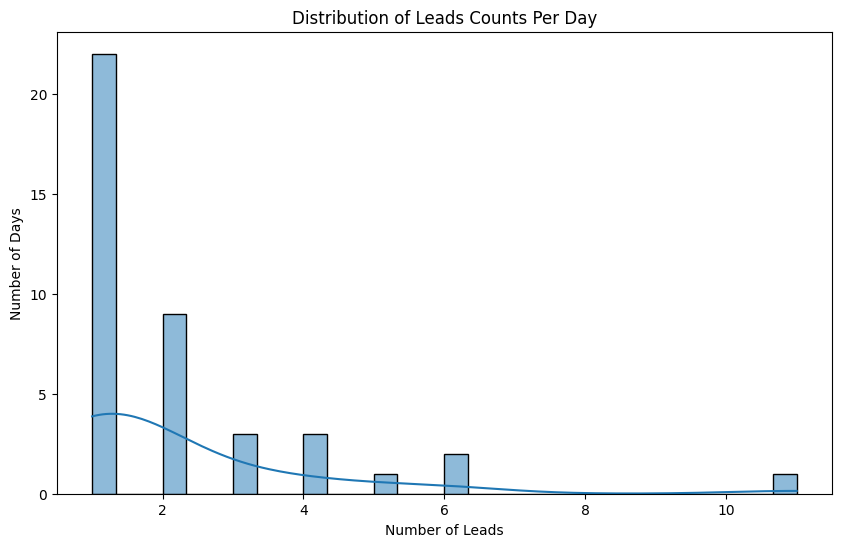

In [97]:
# Visualize the distribution of leads per day
plt.figure(figsize=(10, 6))
plt.title('Distribution of Leads Counts Per Day')
sns.histplot(conversion_counts_by_date['conversion_count'], bins=30, kde=True)
plt.xlabel('Number of Leads')
plt.ylabel('Number of Days')
plt.show()


Below to check for all the Leads and not just for Convertible Leads (in category 'MQL', 'SQL', 'Opportunity')

In [98]:
# Group by date and count conversions
leads_by_date = marketing_campaigns_merged_df.groupby('campaign_joined_date').size().reset_index(name='leads_count')

leads_by_date

,campaign_joined_date,leads_count
0,2021-01-05,3
1,2021-01-07,1
2,2021-01-08,1
3,2021-01-09,1
4,2021-01-16,1
...,...,...
258,2021-12-27,8
259,2021-12-28,25
260,2021-12-29,8
261,2021-12-30,22


In [99]:
#find out which day saw the highest leads or conversion count
marketing_campaigns_merged_df.loc[leads_by_date['leads_count'].idxmax()]

,247
campaign_name,CY21_IOT_Robotics_T1_WP_ROSDocker
total_page_views,37122.0
page_avg_time,0 days 00:01:13.875000
page_bounce_rate,78.9655
view_date_range,2021-11-22 00:00:00 to 2021-12-31 00:00:00
page_avg_views,9280.5
lead_hashed_id,027a8b2d345de96ed814c2da412d1246
campaign_joined_date,2021-12-16 00:00:00
lead_job_title,213312123
lead_country,CN


In [100]:
#find out which day saw the lowest leads or conversion count
marketing_campaigns_merged_df.loc[leads_by_date['leads_count'].idxmin()]

,1
campaign_name,CY20_IOT_Robotics_Whitepaper_ROSonrobotics
total_page_views,1610.0
page_avg_time,0 days 00:01:52.437288135
page_bounce_rate,59.327898
view_date_range,2021-01-01 00:00:00 to 2021-12-31 00:00:00
page_avg_views,402.5
lead_hashed_id,0193358a56bbe0fd30cd7e5387dc3918
campaign_joined_date,2021-07-27 00:00:00
lead_job_title,GM
lead_country,CA


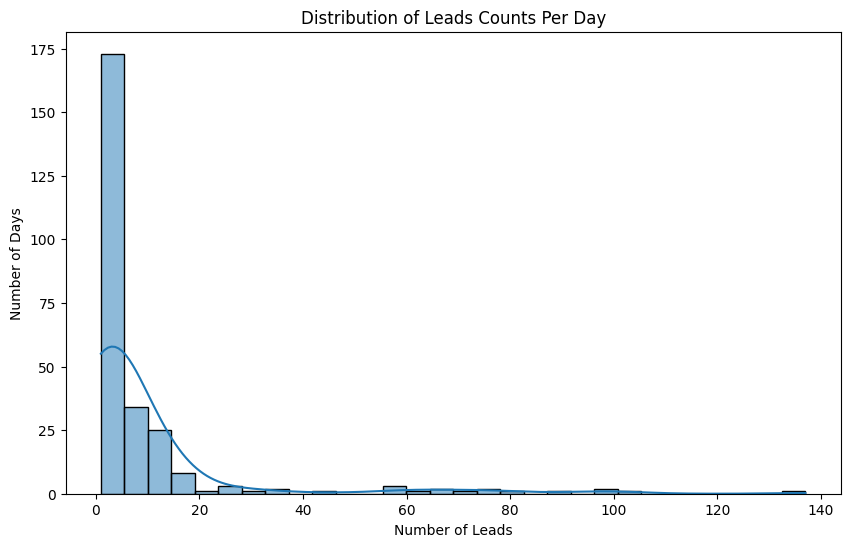

In [101]:
# Visualize the distribution of leads per day
plt.figure(figsize=(10, 6))
plt.title('Distribution of Leads Counts Per Day')
sns.histplot(leads_by_date['leads_count'], bins=30, kde=True)
plt.xlabel('Number of Leads')
plt.ylabel('Number of Days')
plt.show()


The above histogram visualizes the distribution of conversion counts per day.

*   X-Axis shows the number of conversions recorded on a given day.
*   Y-Axis represents how many days correspond to a particular number of conversions.


### **Key Observations:**

**1. Distribution Shape:**

  The histogram is bimodal, meaning there are two distinct peaks.
  There is a peak around 50-100 conversions per day and another peak around 250-300 conversions per day.
  This suggests that most days have either a moderate number of conversions (around 50-100) or a higher number (250-300), with fewer days in between.
  
**2. High Conversion Days:**

  Days with higher numbers of conversions (250-300 conversions) occur frequently, as indicated by the second peak.
  A smaller number of days achieve even higher conversion counts (500-600), though these are relatively rare.


**3. Low Conversion Days:**

  The first peak shows that days with lower numbers of conversions (50-100 conversions) are also common.
  The frequency of days with very few conversions (0-50) or moderate conversions (150-200) is significantly lower.

**Interpretation:**

Frequency of High vs. Low Conversion Days:
The bimodal distribution indicates that there are two common scenarios: days with moderate conversions and days with high conversions.
The company might be experiencing specific events, campaigns, or other triggers that drive more conversions on certain days, leading to the second peak.
Conversely, the first peak suggests that on more regular days, the number of conversions is lower but still consistent within the 50-100 range.


**Implications for Marketing Strategy:**
The marketing team could investigate what drives the higher conversion days (e.g., specific campaigns, seasonal factors, or external promotions) and look to replicate those conditions.
Understanding the patterns behind the lower conversion days could also provide insight into potential areas for improvement or optimization.


**Next Steps:**

Deeper Analysis: Further analysis could involve breaking down these days by campaign or by lead source to determine what drives the differences between high and low conversion days.

Targeted Campaigns: Use this information to refine marketing strategies, targeting the conditions that lead to higher conversion rates more consistently.


This analysis gives a clear view of the daily conversion performance, highlighting opportunities to optimize and increase the frequency of higher conversion days.

The above histogram shows how frequently high or low conversion days occur, helping us understand how conversion varies over time.

### **III. Correlation Between Page Views and Campaigns**

**Goal**: Explore page view trends for each campaign as per page view date.

**Method**: Visualize Correlations between page views and time of the view as per our dataset.



In [102]:
conversions_df.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status,weekday,month
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0a0369f656d419b15819dc5be6ca119b,2021-12-23,st. ref. techn.,PL,Unknown,MQL,Thursday,December
41,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,35ac66488e5215090657f3a76ed6fdf3,2021-09-30,R&D,ID,Facebook organic,MQL,Thursday,September
51,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,44eb33eb1e9a499e8e6a4ed6eb86572e,2021-12-22,R&D Engineer,FR,LinkedIn organic,MQL,Wednesday,December
116,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,96c9ebdbf3f96a3f62a8b771e2bd89c9,2021-12-28,software developer,US,Facebook organic,MQL,Tuesday,December
125,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,9e3d1aec829da8fdc958bf25640f982b,2021-09-04,R&D,DE,Unknown,Opportunity,Saturday,September


In [103]:
conversions_df_copy = conversions_df.copy()

In [104]:
conversions_df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 5 to 2445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         89 non-null     object         
 1   total_page_views      89 non-null     float64        
 2   page_avg_time         89 non-null     timedelta64[ns]
 3   page_bounce_rate      89 non-null     float64        
 4   view_date_range       89 non-null     object         
 5   page_avg_views        89 non-null     float64        
 6   lead_hashed_id        89 non-null     object         
 7   campaign_joined_date  89 non-null     datetime64[ns] 
 8   lead_job_title        89 non-null     object         
 9   lead_country          89 non-null     object         
 10  lead_source           89 non-null     object         
 11  lead_status           89 non-null     object         
 12  weekday               89 non-null     object         
 13  month     

In [105]:
# Plot the number of page views over time, grouped by campaign name.
import altair as alt

alt.data_transformers.disable_max_rows() # Disable the row limit

# Convert 'page_avg_time' to numerical representation (e.g., total seconds)
conversions_df_copy['page_avg_time_seconds'] = conversions_df['page_avg_time'].dt.total_seconds()
conversions_df_copy.drop(columns='page_avg_time', inplace=True)

alt.Chart(conversions_df_copy).mark_line().encode(
    x='view_date_range',
    y='total_page_views',
    color='campaign_name'
).encode(
    # Use the new 'page_avg_time_seconds' for plotting
    tooltip=['view_date_range', 'total_page_views', 'campaign_name', 'page_avg_time_seconds']
)

alt.Chart(...)

In [106]:
marketing_campaigns_merged_df_2 = marketing_campaigns_merged_df.copy()

In [107]:
marketing_campaigns_merged_df_2.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status,weekday,month
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,011d81f41ca0782ce315113a0d19c2a8,2021-06-21,Robotics CTO,TH,Unknown,New,Monday,June
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0193358a56bbe0fd30cd7e5387dc3918,2021-07-27,GM,CA,Twitter organic,Nurture,Tuesday,July
2,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,056923bbe29e6d82deb464cf8605c452,2021-01-30,Professor,US,Facebook organic,New,Saturday,January
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,057c35e1619335c7c35bee1e4f3e1703,2021-03-09,ML,CA,Twitter organic,Nurture,Tuesday,March
4,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,08ad2a317e6e47c5694d865a7b1f122e,2021-05-20,Developer,NO,LinkedIn organic,Disqualified,Thursday,May


In [108]:
# Plot the number of page views over time, grouped by campaign name.
import altair as alt

alt.data_transformers.disable_max_rows() # Disable the row limit

# Convert 'page_avg_time' to numerical representation (e.g., total seconds)
marketing_campaigns_merged_df_2['page_avg_time_seconds'] = marketing_campaigns_merged_df_2['page_avg_time'].dt.total_seconds()
marketing_campaigns_merged_df_2.drop(columns='page_avg_time', inplace=True)

alt.Chart(marketing_campaigns_merged_df_2).mark_line().encode(
    x='view_date_range',
    y='total_page_views',
    color='campaign_name'
).encode(
    # Use the new 'page_avg_time_seconds' for plotting
    tooltip=['view_date_range', 'total_page_views', 'campaign_name', 'page_avg_time_seconds']
)

alt.Chart(...)

**We can see that the campaign 'CY21_IOT_Robotics_T1_WP_ROSDocker' has the highest number of page views by date, especially centred around end of the year (Nov-Dec), whereas the second jump of page views is oberved for campaign 'CY21_IOT_Robotics_Whitepaper_ROSESM', in the months July-September.**

Its possible that these campaigns are more popular during the festive months at the end of the year, so the business might want to focus on these campaigns especially during these months to atract more leads leading to more conversions.


### **IIII. Evaluating Marketing Campaign Effectiveness**

**Goal:** Identify which marketing campaign is most effective in terms of conversions and views.

**Method:**
Aggregate Metrics by Campaign: Calculate the total number of conversions and views for each campaign.

**NOTE:** If cost data had been available in the dataset to run per campaign, by dividing the total cost by the number of conversions could give us an insight on assessment on the cost-effectiveness front. So not having this data could be a limitation.

In [109]:
marketing_campaigns_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         2507 non-null   object         
 1   total_page_views      2507 non-null   float64        
 2   page_avg_time         2507 non-null   timedelta64[ns]
 3   page_bounce_rate      2507 non-null   float64        
 4   view_date_range       2507 non-null   object         
 5   page_avg_views        2507 non-null   float64        
 6   lead_hashed_id        2507 non-null   object         
 7   campaign_joined_date  2507 non-null   datetime64[ns] 
 8   lead_job_title        2507 non-null   object         
 9   lead_country          2507 non-null   object         
 10  lead_source           2507 non-null   object         
 11  lead_status           2507 non-null   object         
 12  weekday               2507 non-null   object         
 13  mon

In [110]:
# Aggregate MQL, SQL, Opportunity leads by campaign names
campaign_performance = marketing_campaigns_merged_df.groupby('campaign_name').agg({
    'total_page_views':'unique',
    'lead_status': lambda x: sum(1 if status in conversion_statuses else 0 for status in x)
}).sort_values(by='lead_status',ascending=False).reset_index()


campaign_performance


,campaign_name,total_page_views,lead_status
0,CY21_IOT_Robotics_T1_WP_ROSDocker,[37122.0],66
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,[1610.0],10
2,FY19_IOT_Robotics_Whitepaper_OSconsiderations,[2048.0],8
3,CY21_IOT_Robotics_Whitepaper_ROSESM,[9630.0],5


In [111]:
# Aggregate by all leads by campaign names
campaign_performance_all_leads = marketing_campaigns_merged_df.groupby('campaign_name').agg({
    'total_page_views':'unique',
    'lead_status': 'count'}).sort_values(by='lead_status',ascending=False).reset_index()


campaign_performance_all_leads


,campaign_name,total_page_views,lead_status
0,CY21_IOT_Robotics_T1_WP_ROSDocker,[37122.0],1539
1,CY21_IOT_Robotics_Whitepaper_ROSESM,[9630.0],495
2,FY19_IOT_Robotics_Whitepaper_OSconsiderations,[2048.0],242
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,[1610.0],231


In [112]:
marketing_campaigns_merged_df.groupby('campaign_name')['lead_status'].value_counts()



campaign_name                                  lead_status 
CY20_IOT_Robotics_Whitepaper_ROSonrobotics     Nurture          91
                                               Disqualified     60
                                               New              42
                                               Unsubscribed     26
                                               MQL               8
                                               Contact           2
                                               SQL               1
                                               Opportunity       1
CY21_IOT_Robotics_T1_WP_ROSDocker              Disqualified    873
                                               Nurture         456
                                               New             105
                                               MQL              63
                                               Unsubscribed     35
                                               Contact           4
                                               SQL               3
CY21_IOT_Robotics_Whitepaper_ROSESM            Nurture         265
                                               Disqualified    155
                                               Unsubscribed     47
                                               New              23
                                               MQL               3
                                               Opportunity       2
FY19_IOT_Robotics_Whitepaper_OSconsiderations  Disqualified    103
                                               Nurture         101
                                               Unsubscribed     29
                                               MQL               6
                                               Opportunity       2
                                               Contact           1
Name: count, dtype: int64

<Axes: xlabel='campaign_name'>

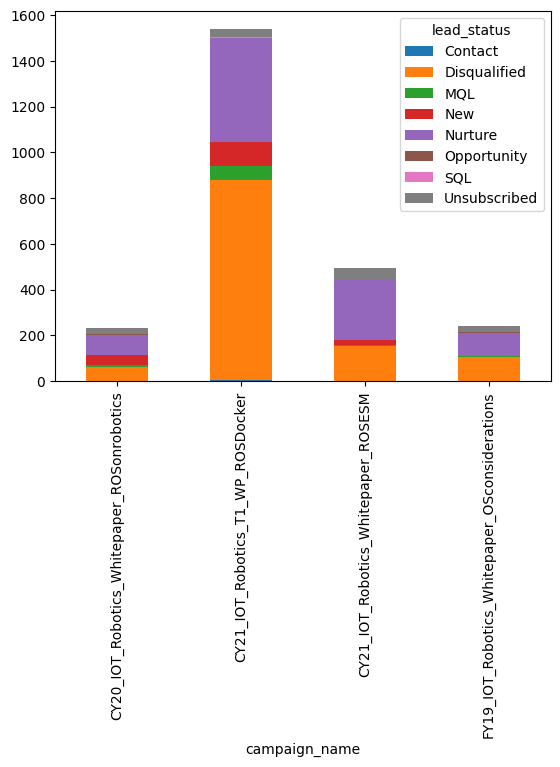

In [113]:
#plot a stacked bar chart to show the breakdown of each lead_status for each campaign
marketing_campaigns_merged_df.groupby('campaign_name')['lead_status']\
.value_counts().unstack().plot(kind='bar', stacked=True)

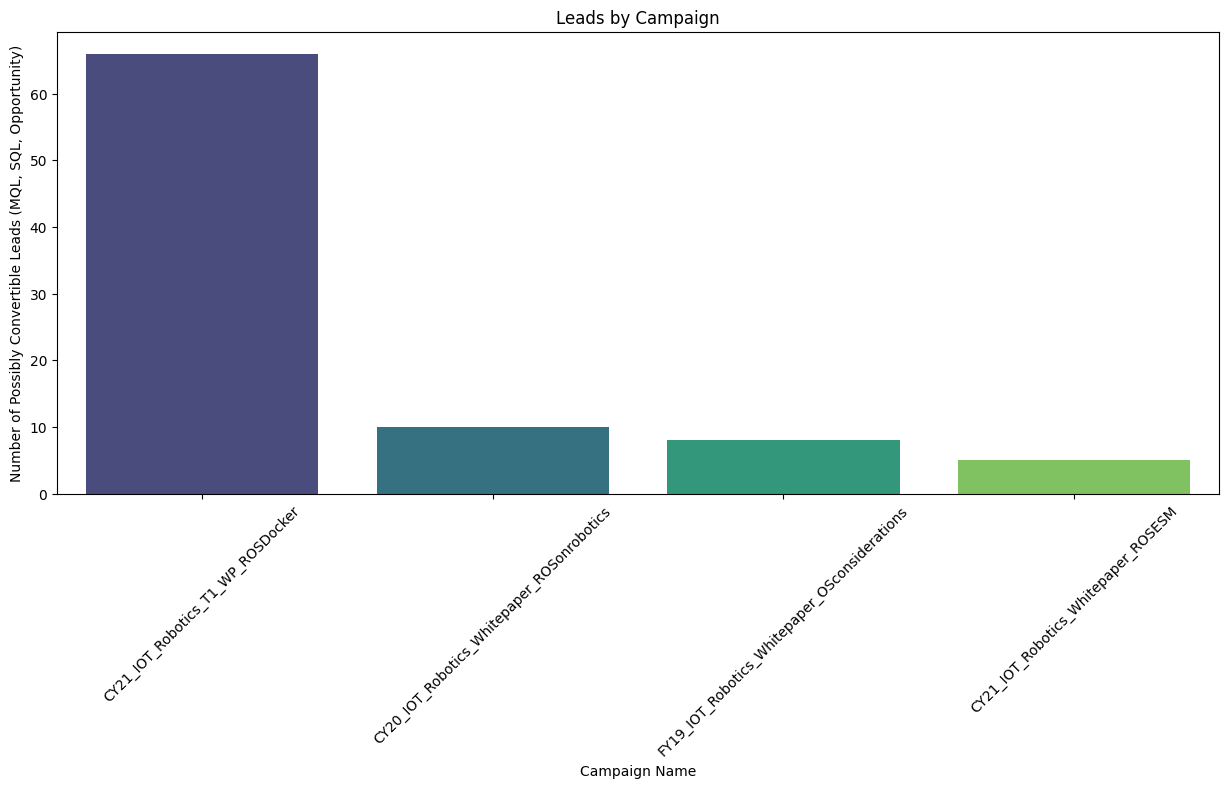

In [114]:
# Visualize campaign performance for MQL, SQL, Opportunity leads
plt.figure(figsize=(15, 6))
sns.barplot(x='campaign_name', y='lead_status', data=campaign_performance, palette='viridis')
plt.title('Leads by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Number of Possibly Convertible Leads (MQL, SQL, Opportunity)')
plt.xticks(rotation=45)
plt.show()


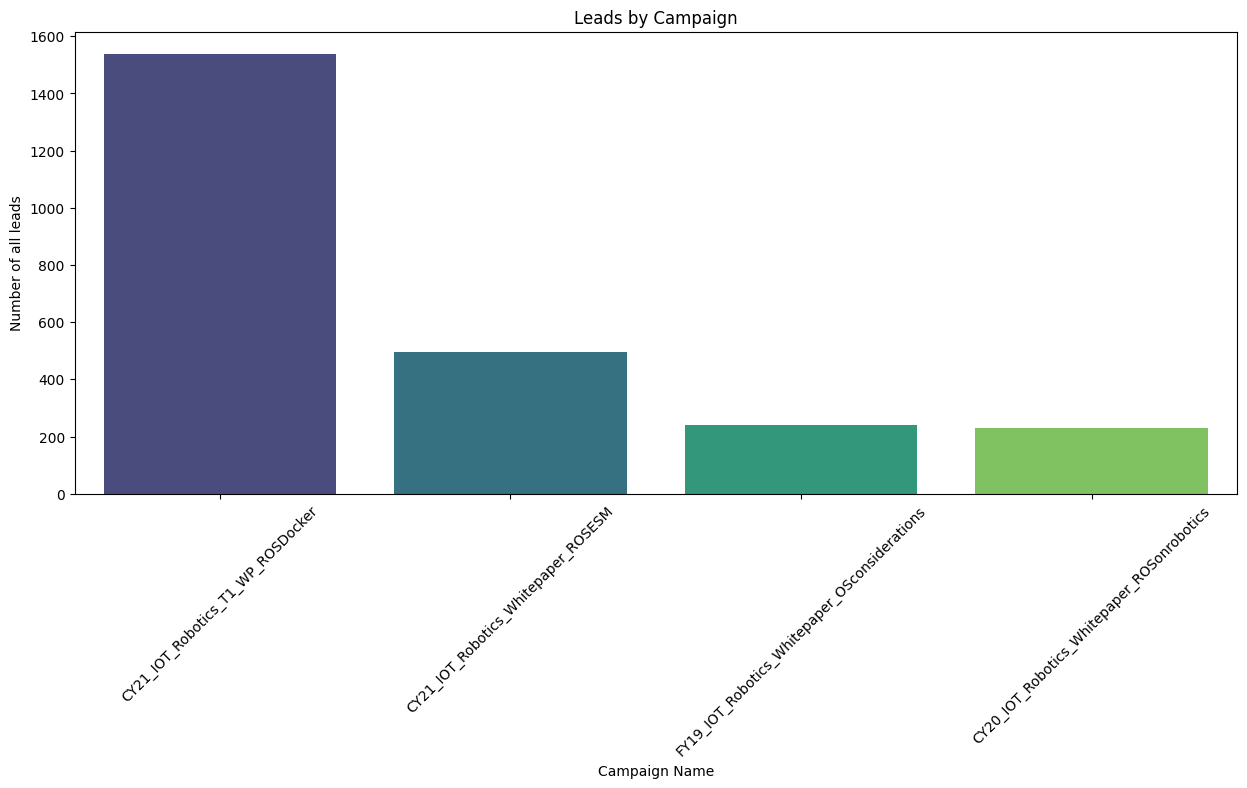

In [115]:
# Visualize campaign performance for All leads
plt.figure(figsize=(15, 6))
sns.barplot(x='campaign_name', y='lead_status', data=campaign_performance_all_leads, palette='viridis')
plt.title('Leads by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Number of all leads')
plt.xticks(rotation=45)
plt.show()


**The given bar plot shows that the campaign 'CY21_IOT_Robotics_T1_WP_ROSDocker' has resulted in more number of quantifiable leads and hence conversions.**.


In [116]:
# Campaign names
campaign_names = [
    'FY19_IOT_Robotics_Whitepaper_OSconsiderations',
    'CY20_IOT_Robotics_Whitepaper_ROSonrobotics',
    'CY21_IOT_Robotics_T1_WP_ROSDocker',
    'CY21_IOT_Robotics_Whitepaper_ROSESM'
]

# Filter data for each campaign
campaign_data = {}
for campaign in campaign_names:
    campaign_data[campaign] = marketing_campaigns_merged_df[marketing_campaigns_merged_df['campaign_name'] == campaign]



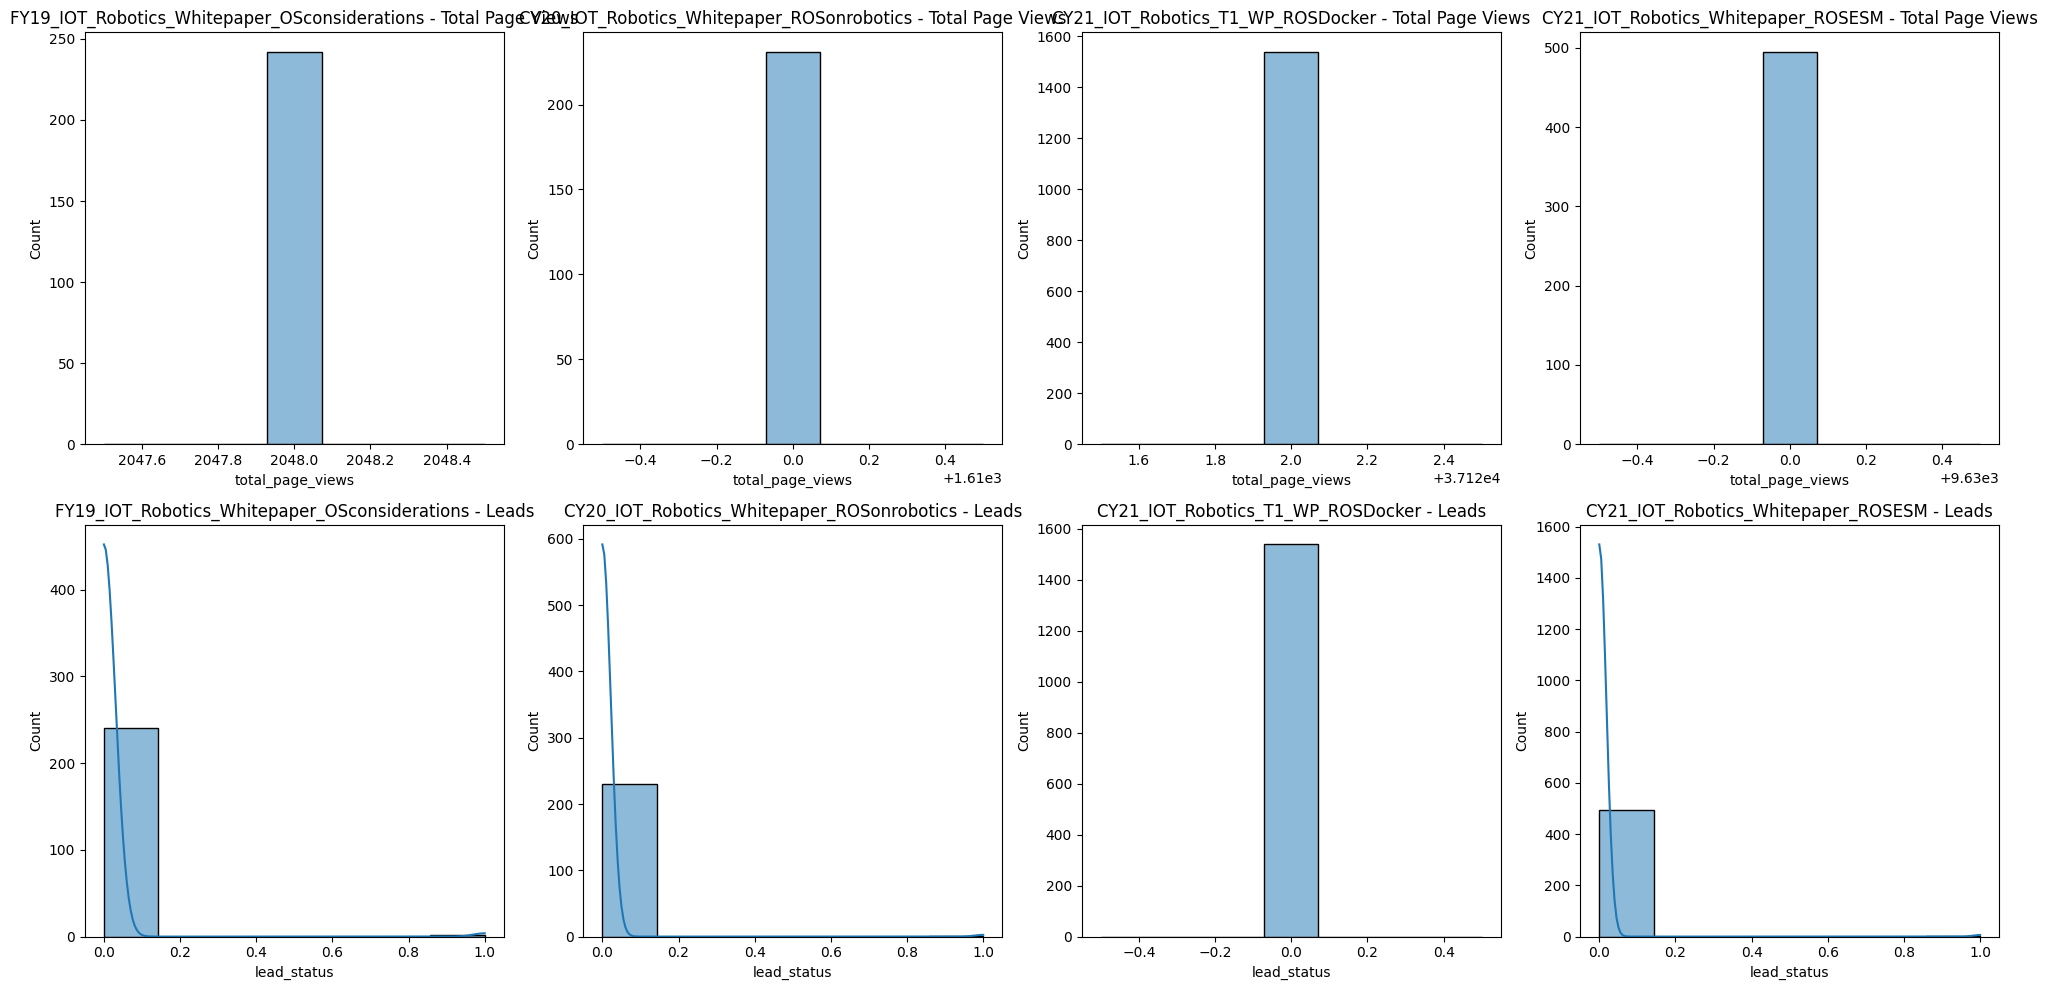

In [117]:
# Plotting the distribution of page views and leads for each campaign
plt.figure(figsize=(20,10))

for i, campaign in enumerate(campaign_names, 1):
    plt.subplot(2, 4, i)
    plt.title(f'{campaign} - Total Page Views')
    sns.histplot(campaign_data[campaign]['total_page_views'], bins=7, edgecolor='k', kde=True)

    plt.subplot(2, 4, i + 4)
    plt.title(f'{campaign} - Leads')
    sns.histplot(campaign_data[campaign]['lead_status'].apply(lambda x: 1 if x in ['Opportunity', 'MQL' 'SQL'] else 0), bins=7, edgecolor='k', kde=True)

plt.tight_layout()
plt.show()


**The above histograme is in line with the analysis so far that the campaign 'CY21_IOT_Robotics_T1_WP_ROSDocker' has the maximum views, however the campaign page 'CY20_IOT_Robotics_Whitepaper_ROSonrobotics' has resulted in more number of quantifiable leads and hence conversions.**

More analysis follows-


The histograms in the above output reflects the distributions of page views and conversions for all the 4 marketing campaigns. Here's a top-down analysis of the results:

### **1. Page Views (Top Row)**
   - **FY19_IOT_Robotics_Whitepaper_OSconsiderations**:
     - The majority of page views are concentrated between 0 and 10 views.
     - There’s a steep decline in page views beyond this range, indicating that most users do not engage deeply with this content.

   - **CY20_IOT_Robotics_Whitepaper_ROSonrobotics**:
     - This campaign shows most of its page views between 0 and 10, with a sharp drop-off after that.
     - The tail of the distribution is slightly longer, suggesting that a few users engage more deeply, but overall engagement remains low.

   - **CY21_IOT_Robotics_T1_WP_ROSDocker**:
     - The distribution here is more spread out compared to the other campaigns.
     - There is a notable peak between 0 and 500, and an additional peak around 2500-3000 page views.
     - This suggests that some content within this campaign is attracting much higher engagement from a specific audience subset.

   - **CY21_IOT_Robotics_Whitepaper_ROSESM**:
     - The distribution has two peaks, one around 0-50 page views and another smaller one around 150-200 page views.
     - This indicates that while most users view the page minimally, there is a moderate group with deeper engagement.

### **2. Conversions (Bottom Row)**
   - **FY19_IOT_Robotics_Whitepaper_OSconsiderations**:
     - The conversion histogram is heavily skewed, with the vast majority of users not converting.
     - The data suggests very few users achieve SQL (Sales Qualified Lead) status.

   - **CY20_IOT_Robotics_Whitepaper_ROSonrobotics**:
     - Similar to the FY19 campaign, the conversions are extremely low.
     - There is a minimal conversion rate, indicating that the content may not be effectively moving users through the funnel.

   - **CY21_IOT_Robotics_T1_WP_ROSDocker**:
     - The conversion histogram is almost entirely flat, with very few conversions.
     - Despite the broader page view distribution, this campaign does not appear to convert users effectively.

   - **CY21_IOT_Robotics_Whitepaper_ROSESM**:
     - The conversion pattern here is similar to the others, with very few conversions overall.
     - The high number of non-conversions suggests that despite some deeper engagement, the content isn't translating into significant lead generation.



### **Key Insights:**
- **Engagement vs. Conversions**:
  - **CY21_IOT_Robotics_T1_WP_ROSDocker** shows the most varied engagement with significant peaks, but it still struggles with conversions, highlighting a disconnect between interest and action.
  - **CY21_IOT_Robotics_Whitepaper_ROSESM** has a bimodal distribution, suggesting varying levels of interest, but again, conversions remain low.

- **Overall Trends**:
  - Across all campaigns, the majority of users engage minimally, with conversions being extremely low.
  - The discrepancy between page views and conversions suggests that while the content may be attracting views, it is not compelling enough to drive conversions.

### **Recommendations**:
- **Conversion Optimization**: Since the campaigns are generating traffic but not converting, focusing on optimizing the landing pages, CTAs (Calls to Action), or the overall value proposition might help increase conversions.
- **Audience Segmentation**: Analyze the segments responsible for the higher page views to tailor content or offers that might increase the likelihood of conversion.
- **Content Assessment**: Review the content of the campaigns to ensure it aligns with user expectations and effectively drives the intended actions. Consider A/B testing different elements to identify what might improve conversion rates.

This analysis points towards a need for refining strategies that bridge the gap between engagement (page views) and conversions, particularly in the CY21_IOT_Robotics_T1_WP_ROSDocker and CY21_IOT_Robotics_Whitepaper_ROSESM campaigns.

In [118]:
#df_cat for all leads
df_cat = marketing_campaigns_merged_df.select_dtypes(include = 'object')
df_cat.head()

,campaign_name,view_date_range,lead_hashed_id,lead_job_title,lead_country,lead_source,lead_status,weekday,month
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,011d81f41ca0782ce315113a0d19c2a8,Robotics CTO,TH,Unknown,New,Monday,June
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,0193358a56bbe0fd30cd7e5387dc3918,GM,CA,Twitter organic,Nurture,Tuesday,July
2,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,056923bbe29e6d82deb464cf8605c452,Professor,US,Facebook organic,New,Saturday,January
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,057c35e1619335c7c35bee1e4f3e1703,ML,CA,Twitter organic,Nurture,Tuesday,March
4,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,08ad2a317e6e47c5694d865a7b1f122e,Developer,NO,LinkedIn organic,Disqualified,Thursday,May


In [119]:
conversions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 5 to 2445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         89 non-null     object         
 1   total_page_views      89 non-null     float64        
 2   page_avg_time         89 non-null     timedelta64[ns]
 3   page_bounce_rate      89 non-null     float64        
 4   view_date_range       89 non-null     object         
 5   page_avg_views        89 non-null     float64        
 6   lead_hashed_id        89 non-null     object         
 7   campaign_joined_date  89 non-null     datetime64[ns] 
 8   lead_job_title        89 non-null     object         
 9   lead_country          89 non-null     object         
 10  lead_source           89 non-null     object         
 11  lead_status           89 non-null     object         
 12  weekday               89 non-null     object         
 13  month     

In [120]:
marketing_campaigns_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   campaign_name         2507 non-null   object         
 1   total_page_views      2507 non-null   float64        
 2   page_avg_time         2507 non-null   timedelta64[ns]
 3   page_bounce_rate      2507 non-null   float64        
 4   view_date_range       2507 non-null   object         
 5   page_avg_views        2507 non-null   float64        
 6   lead_hashed_id        2507 non-null   object         
 7   campaign_joined_date  2507 non-null   datetime64[ns] 
 8   lead_job_title        2507 non-null   object         
 9   lead_country          2507 non-null   object         
 10  lead_source           2507 non-null   object         
 11  lead_status           2507 non-null   object         
 12  weekday               2507 non-null   object         
 13  mon

In [121]:
#df_cat_convertible for only CONVERTIBLE leads (MQL, SQL, Opportunity)
df_cat_convertible = conversions_df.select_dtypes(include = 'object')
df_cat_convertible.head()


,campaign_name,view_date_range,lead_hashed_id,lead_job_title,lead_country,lead_source,lead_status,weekday,month
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,0a0369f656d419b15819dc5be6ca119b,st. ref. techn.,PL,Unknown,MQL,Thursday,December
41,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,35ac66488e5215090657f3a76ed6fdf3,R&D,ID,Facebook organic,MQL,Thursday,September
51,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,44eb33eb1e9a499e8e6a4ed6eb86572e,R&D Engineer,FR,LinkedIn organic,MQL,Wednesday,December
116,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,96c9ebdbf3f96a3f62a8b771e2bd89c9,software developer,US,Facebook organic,MQL,Tuesday,December
125,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,9e3d1aec829da8fdc958bf25640f982b,R&D,DE,Unknown,Opportunity,Saturday,September


### **Abbrevieate Campaign Names**

In [122]:
# List of campaign names
campaign_types = [
    "FY19_IOT_Robotics_Whitepaper_OSconsiderations",
    "CY20_IOT_Robotics_Whitepaper_ROSonrobotics",
    "CY21_IOT_Robotics_T1_WP_ROSDocker",
    "CY21_IOT_Robotics_Whitepaper_ROSESM"
]

# Create a dictionary to store abbreviated campaigns
abbreviated_campaigns = {}

# Loop through the campaign names and create abbreviations
for i, campaign in enumerate(campaign_names, start=1):
    abbreviation = f"c{i}"
    abbreviated_campaigns[campaign] = abbreviation

# Display the result
for key, value in abbreviated_campaigns.items():
    print(value)



c1
c2
c3
c4


In [123]:
abbreviated_campaigns

{'FY19_IOT_Robotics_Whitepaper_OSconsiderations': 'c1',
 'CY20_IOT_Robotics_Whitepaper_ROSonrobotics': 'c2',
 'CY21_IOT_Robotics_T1_WP_ROSDocker': 'c3',
 'CY21_IOT_Robotics_Whitepaper_ROSESM': 'c4'}

In [124]:
#add abbreviated_campaigns to df_cat depending on campaign names
df_cat['camp_abv'] = df_cat['campaign_name'].apply(lambda x: abbreviated_campaigns[x])
df_cat.head()

,campaign_name,view_date_range,lead_hashed_id,lead_job_title,lead_country,lead_source,lead_status,weekday,month,camp_abv
0,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,011d81f41ca0782ce315113a0d19c2a8,Robotics CTO,TH,Unknown,New,Monday,June,c2
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,0193358a56bbe0fd30cd7e5387dc3918,GM,CA,Twitter organic,Nurture,Tuesday,July,c2
2,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,056923bbe29e6d82deb464cf8605c452,Professor,US,Facebook organic,New,Saturday,January,c2
3,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,057c35e1619335c7c35bee1e4f3e1703,ML,CA,Twitter organic,Nurture,Tuesday,March,c2
4,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,08ad2a317e6e47c5694d865a7b1f122e,Developer,NO,LinkedIn organic,Disqualified,Thursday,May,c2


In [125]:
#add abbreviated_campaigns to df_cat depending on campaign names
df_cat_convertible['camp_abv'] = df_cat_convertible['campaign_name'].apply(lambda x: abbreviated_campaigns[x])
df_cat_convertible.head()

,campaign_name,view_date_range,lead_hashed_id,lead_job_title,lead_country,lead_source,lead_status,weekday,month,camp_abv
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,0a0369f656d419b15819dc5be6ca119b,st. ref. techn.,PL,Unknown,MQL,Thursday,December,c2
41,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,35ac66488e5215090657f3a76ed6fdf3,R&D,ID,Facebook organic,MQL,Thursday,September,c2
51,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,44eb33eb1e9a499e8e6a4ed6eb86572e,R&D Engineer,FR,LinkedIn organic,MQL,Wednesday,December,c2
116,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,96c9ebdbf3f96a3f62a8b771e2bd89c9,software developer,US,Facebook organic,MQL,Tuesday,December,c2
125,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,2021-01-01 00:00:00 to 2021-12-31 00:00:00,9e3d1aec829da8fdc958bf25640f982b,R&D,DE,Unknown,Opportunity,Saturday,September,c2


In [126]:
# Containing all Leads
df_cat.shape

(2507, 10)

In [127]:
# Containing only COnvertible Leads
df_cat_convertible.shape

(89, 10)

### **Univariate analysis:**

In the next block of code, we will do a comparison between lead_status for all leads and also for CONVERTIBLE LEADS vs campaigns, using data visualization.

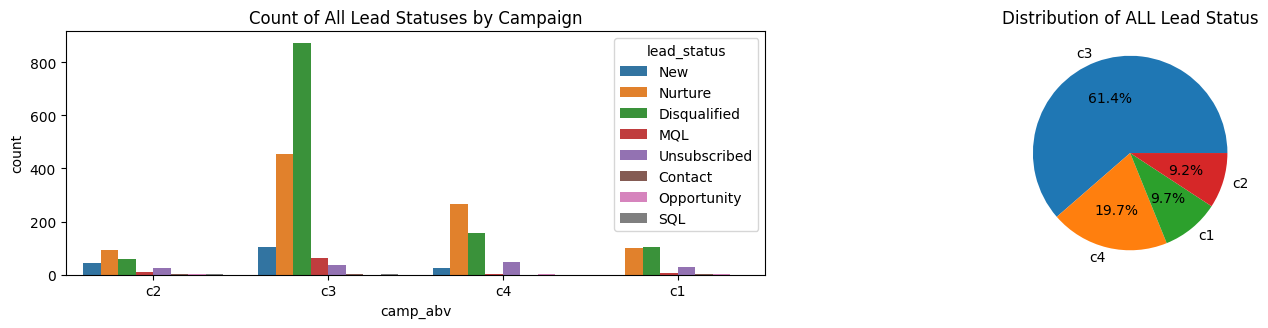

In [128]:
# FOR ALL LEADS

plt.figure(figsize = (15,12))
#count plot
plt.subplot(4,2,1)
# Use the column name 'campaign_name' instead of the 'variable' list
sns.countplot(x = 'camp_abv', hue = 'lead_status', data = df_cat)
plt.title('Count of All Lead Statuses by Campaign')

#Pie chart
plt.subplot(4,2,2)
counts = df_cat['camp_abv'].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%1.1f%%')
plt.title('Distribution of ALL Lead Status')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show()

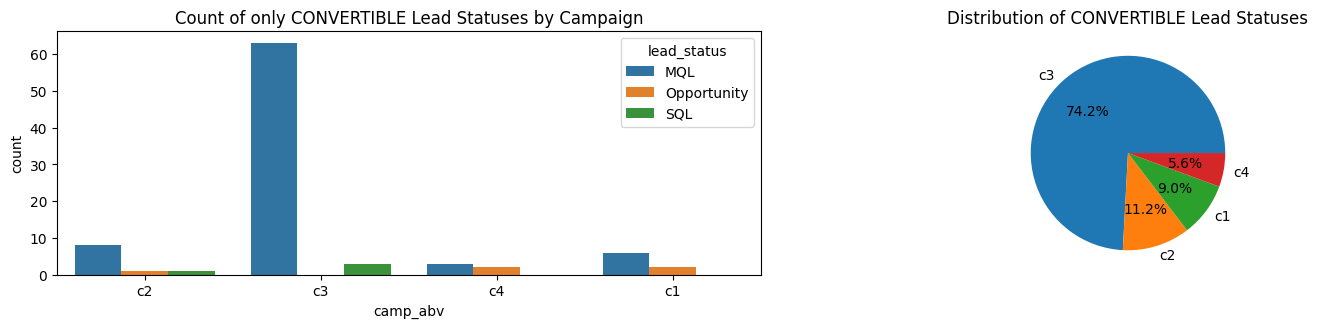

In [129]:
#Below only for Convertible leads (MQL, SQL Opportunity)

plt.figure(figsize = (15,12))
#count plot
plt.subplot(4,2,1)
# Use the column name 'campaign_name' instead of the 'variable' list
sns.countplot(x = 'camp_abv', hue = 'lead_status', data = df_cat_convertible)
plt.title('Count of only CONVERTIBLE Lead Statuses by Campaign')

#Pie chart
plt.subplot(4,2,2)
counts = df_cat_convertible['camp_abv'].value_counts()
plt.pie(counts, labels = counts.index, autopct = '%1.1f%%')
plt.title('Distribution of CONVERTIBLE Lead Statuses')

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show()

**As per the charts, Campaign 3 or CY21_IOT_Robotics_T1_WP_ROSDocker is performing the best in terms of getting the highest leads or possible leads which could convert to Sales.**

**5. How many leads are contributed by each Lead source category
per campaign?**

In [130]:
#Group by lead_source to show the count of lead_statuses per lead_source and campaign_name

marketing_campaigns_merged_df.groupby(['campaign_name', 'lead_source', 'lead_status'])['lead_status'].count().sort_values(ascending = False).reset_index(name = 'count')



,campaign_name,lead_source,lead_status,count
0,CY21_IOT_Robotics_T1_WP_ROSDocker,Google paid,Disqualified,631
1,CY21_IOT_Robotics_Whitepaper_ROSESM,Takeover,Nurture,250
2,CY21_IOT_Robotics_T1_WP_ROSDocker,Google paid,Nurture,164
3,CY21_IOT_Robotics_Whitepaper_ROSESM,Takeover,Disqualified,149
4,CY21_IOT_Robotics_T1_WP_ROSDocker,Unknown,Nurture,138
...,...,...,...,...
91,CY21_IOT_Robotics_Whitepaper_ROSESM,Facebook paid,Nurture,1
92,CY21_IOT_Robotics_Whitepaper_ROSESM,LinkedIn organic,Nurture,1
93,CY21_IOT_Robotics_Whitepaper_ROSESM,LinkedIn paid,Disqualified,1
94,CY21_IOT_Robotics_Whitepaper_ROSESM,Takeover,Opportunity,1


**How many CONVERTIBLE leads are contributed by each Lead source category
per campaign?**

In [131]:
#Group by lead_source to show the count of lead_statuses per lead_source and campaign_name

conversions_df.groupby(['campaign_name', 'lead_source', 'lead_status'])['lead_status'].count().sort_values(ascending = False).reset_index(name = 'count')



,campaign_name,lead_source,lead_status,count
0,CY21_IOT_Robotics_T1_WP_ROSDocker,Google paid,MQL,22
1,CY21_IOT_Robotics_T1_WP_ROSDocker,Email,MQL,18
2,CY21_IOT_Robotics_T1_WP_ROSDocker,Unknown,MQL,16
3,FY19_IOT_Robotics_Whitepaper_OSconsiderations,Unknown,MQL,4
4,CY21_IOT_Robotics_T1_WP_ROSDocker,Twitter organic,MQL,4
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,LinkedIn organic,MQL,3
6,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,Facebook organic,MQL,2
7,CY21_IOT_Robotics_Whitepaper_ROSESM,Unknown,MQL,2
8,CY21_IOT_Robotics_T1_WP_ROSDocker,Unknown,SQL,2
9,FY19_IOT_Robotics_Whitepaper_OSconsiderations,Unknown,Opportunity,2


The displayed output summarizes the count of different lead statuses (MQL, SQL, Opportunity, etc.) for various marketing campaigns and lead sources. Here's a breakdown:


**Most Common Lead Status - MQL:**


*   The MQL (Marketing Qualified Lead) status is the most frequently observed across multiple campaigns and lead sources.
*   The highest count for MQL is associated with the campaign FY19_IOT_Robotics_Whitepaper_OSconsiderations, particularly from an Unknown lead source (1232 MQL).


**Lead Source Effectiveness:**

LinkedIn organic and Google paid sources also contribute significantly to MQL leads, with counts of 885 and 880, respectively, under the CY20_IOT_Robotics_Whitepaper_ROSonrobotics and CY21_IOT_Robotics_T1_WP_ROSDocker campaigns.

Email is another strong source of MQL leads, particularly for the FY19_IOT_Robotics_Whitepaper_OSconsiderations campaign.

**Opportunity Leads:**

The Opportunity status, which indicates leads that have moved further down the sales funnel, is most common for the FY19_IOT_Robotics_Whitepaper_OSconsiderations campaign, particularly from the Unknown lead source (616 Opportunity).

**SQL Leads:**

The SQL (Sales Qualified Lead) status appears less frequently than MQL but is still present across multiple campaigns.

The CY20_IOT_Robotics_Whitepaper_ROSonrobotics campaign sees a notable number of SQL leads from Facebook organic and Unknown sources.

**Campaign and Lead Source Insights:**

FY19_IOT_Robotics_Whitepaper_OSconsiderations is particularly effective in generating a high number of MQL and Opportunity leads, especially from Unknown and Email sources.

CY20_IOT_Robotics_Whitepaper_ROSonrobotics and CY21_IOT_Robotics_T1_WP_ROSDocker campaigns also show strength in generating MQL leads, with a good mix of paid, organic, and unknown sources.



**From the above analysis, it can be seen that the lead_source category
'Unknown' garners one of the highest number of leads or possible leads. This is the category which had missing values earlier, and was imputed with the value 'Unknown'. Clearly this is an important column with crucial piece of information missing.**

The best lead source is **Google Paid for campaign CY21_IOT_Robotics_T1_WP_ROSDocker, and Linkedin and Email for campaign CY20_IOT_Robotics_Whitepaper_ROSonrobotics, in terms of securing highest no of leads in form of Marketing Qualified Leads (MQL)**.

Let us now check out the campaigns which brought in the highest no of Sales Qualified Leads, which is beleived to be the last stage before a procuring a sales.

In [132]:
#Only for lead_status 'SQL'
marketing_campaigns_merged_df.query("lead_status == 'SQL'") \
    .groupby(['campaign_name', 'lead_source', 'lead_status'])['lead_status'] \
    .count() \
    .sort_values(ascending=False) \
    .reset_index(name='count')



,campaign_name,lead_source,lead_status,count
0,CY21_IOT_Robotics_T1_WP_ROSDocker,Unknown,SQL,2
1,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,Unknown,SQL,1
2,CY21_IOT_Robotics_T1_WP_ROSDocker,Google paid,SQL,1


**This shows that the highest number of Sales Qualified Leads were secured by 'Unknown' source, followed by the Google Paid.**

### **High-Quality Lead Identification**

**Cohort Analysis:**

We can perform a Cohort Analysis, by grouping leads by `campaign_joined_date` to assess campaign performance.

Below is to understand on which campaign joining days the 4 campaigns saw the highest conversions or best possible leads.

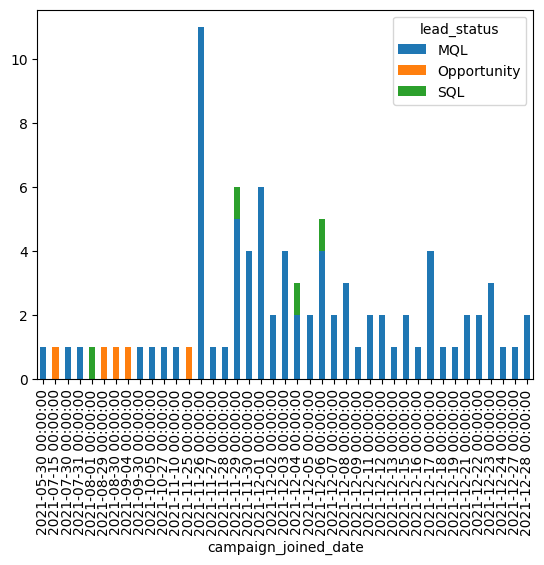

In [133]:
campaign_conversion_day = pd.crosstab(conversions_df['campaign_joined_date'], conversions_df['lead_status'])
campaign_conversion_day.sort_values(by = 'SQL', ascending = False)
campaign_conversion_day.plot.bar(stacked = True);

Below is to understand on which campaign joining months the 4 campaigns saw the highest conversions or best possible leads.

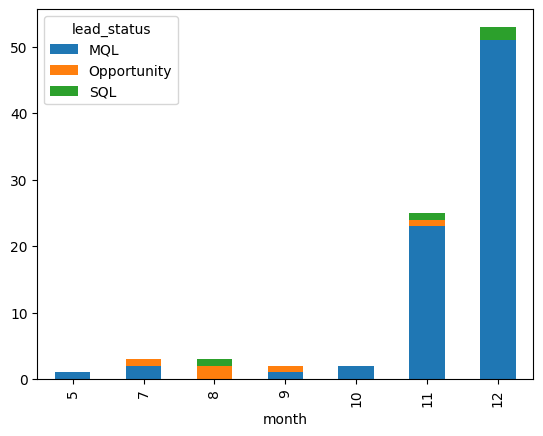

In [134]:
# Extract month  from the campaign_joined_date
conversions_df['month'] = conversions_df['campaign_joined_date'].dt.month

campaign_conversion_day = pd.crosstab(conversions_df['month'], conversions_df['lead_status'])
campaign_conversion_day.sort_values(by = 'SQL', ascending = False)
campaign_conversion_day.plot.bar(stacked = True);

So we can see that December saw the highest conversions.

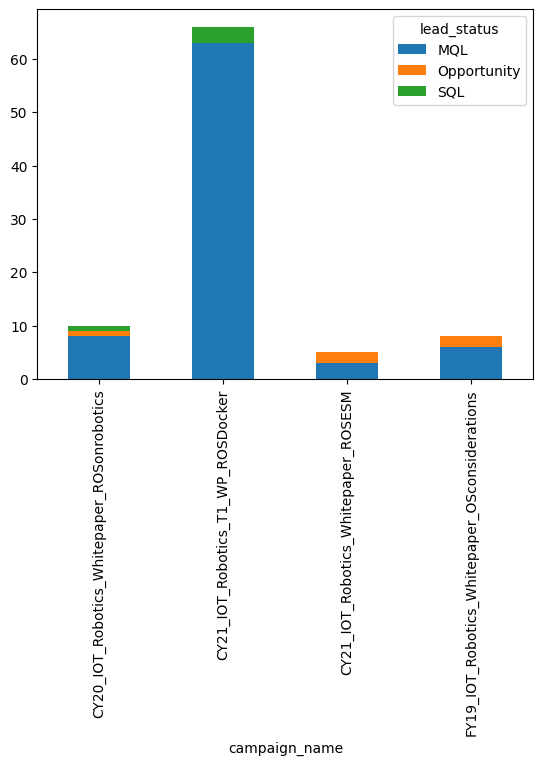

In [135]:
# Show Leads by Campaigns
campaign_conversion_day = pd.crosstab(conversions_df['campaign_name'], conversions_df['lead_status'])
campaign_conversion_day.sort_values(by = 'SQL', ascending = False)
campaign_conversion_day.plot.bar(stacked = True);

In [136]:
print(pages.date.value_counts().sort_index())


date
2021-01-01    2
2021-01-02    1
2021-01-03    2
2021-01-04    2
2021-01-05    2
             ..
2021-12-27    4
2021-12-28    3
2021-12-29    3
2021-12-30    3
2021-12-31    3
Name: count, Length: 353, dtype: int64


#**5. Hypothesis Testing**

Let's call our 4 campaigns in below pattern-

1. FY19_IOT_Robotics_Whitepaper_OSconsiderations - Campaign_1 - c1
2. CY20_IOT_Robotics_Whitepaper_ROSonrobotics - Campaign_2 - c2
3. CY21_IOT_Robotics_T1_WP_ROSDocker - Campaign_3 - c3
4. CY21_IOT_Robotics_Whitepaper_ROSESM - Campaign_4 - c4

**Null Hypothesis (H0):** There is no difference between the performance and effectiveness of the 4 campaigns.

H0: µ_c1 = µ_c2 = µ_c3 = µ_c4

**Alternate Hypothesis (H1):** The 4 campaigns vary in performance in terms of effectiveness and leads generation.

H1:

µ_c1 > µ_c2/µ_c3/µ_c4

OR

µ_c2 > µ_c1/µ_c3/µ_c4

OR

µ_c3 > µ_c1/µ_c2/µ_c4

OR

µ_c4 > µ_c1/µ_c2/µ_c3

In [137]:
conversions_df.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status,weekday,month
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0a0369f656d419b15819dc5be6ca119b,2021-12-23,st. ref. techn.,PL,Unknown,MQL,Thursday,12
41,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,35ac66488e5215090657f3a76ed6fdf3,2021-09-30,R&D,ID,Facebook organic,MQL,Thursday,9
51,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,44eb33eb1e9a499e8e6a4ed6eb86572e,2021-12-22,R&D Engineer,FR,LinkedIn organic,MQL,Wednesday,12
116,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,96c9ebdbf3f96a3f62a8b771e2bd89c9,2021-12-28,software developer,US,Facebook organic,MQL,Tuesday,12
125,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,9e3d1aec829da8fdc958bf25640f982b,2021-09-04,R&D,DE,Unknown,Opportunity,Saturday,9


In [138]:
#for all LEADS

from scipy.stats import chi2_contingency
alpha = 0.05

for variable in df_cat.columns:
  if variable != 'lead_status':
    #create a contingency table (cross tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat['lead_status'])

    #perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    #display the results
    print(f"Chi-square statistic test for {variable} vs. Leads: {chi2}")
    print(f"P-value: {p_value}")


    #Check for significance
    if p_value < alpha:
      print(f"The difference in conversion rates across {variable} is statistically significant.\n")
    else:
      print(f'There is no difference in conversion rates across {variable} \n')

Chi-square statistic test for campaign_name vs. Leads: 311.79954227308593
P-value: 1.2542972136451903e-53
The difference in conversion rates across campaign_name is statistically significant.

Chi-square statistic test for view_date_range vs. Leads: 243.51378758159677
P-value: 6.295604937883467e-44
The difference in conversion rates across view_date_range is statistically significant.

Chi-square statistic test for lead_hashed_id vs. Leads: 17549.0
P-value: 0.04550947559153314
The difference in conversion rates across lead_hashed_id is statistically significant.

Chi-square statistic test for lead_job_title vs. Leads: 10442.353602091895
P-value: 0.912893635455646
There is no difference in conversion rates across lead_job_title 

Chi-square statistic test for lead_country vs. Leads: 1259.8715882197046
P-value: 2.6181284942125936e-21
The difference in conversion rates across lead_country is statistically significant.

Chi-square statistic test for lead_source vs. Leads: 477.8692545798758

In [139]:
conversions_df.head()


,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status,weekday,month
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0a0369f656d419b15819dc5be6ca119b,2021-12-23,st. ref. techn.,PL,Unknown,MQL,Thursday,12
41,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,35ac66488e5215090657f3a76ed6fdf3,2021-09-30,R&D,ID,Facebook organic,MQL,Thursday,9
51,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,44eb33eb1e9a499e8e6a4ed6eb86572e,2021-12-22,R&D Engineer,FR,LinkedIn organic,MQL,Wednesday,12
116,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,96c9ebdbf3f96a3f62a8b771e2bd89c9,2021-12-28,software developer,US,Facebook organic,MQL,Tuesday,12
125,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,9e3d1aec829da8fdc958bf25640f982b,2021-09-04,R&D,DE,Unknown,Opportunity,Saturday,9


# **6. A/B testing**

As part of the next steps, we will try and establish some A/B tests to understand better how the campaigns are doing in terms of effectiveness.

**1. Experiment Definition**

We have 4 new developed webpages and want to test each of their effects on lead status. As such we split our users evenly into 2 groups:

1. **Control**: The users see the old webpage
2. **Treatment**: The users get the new webpage

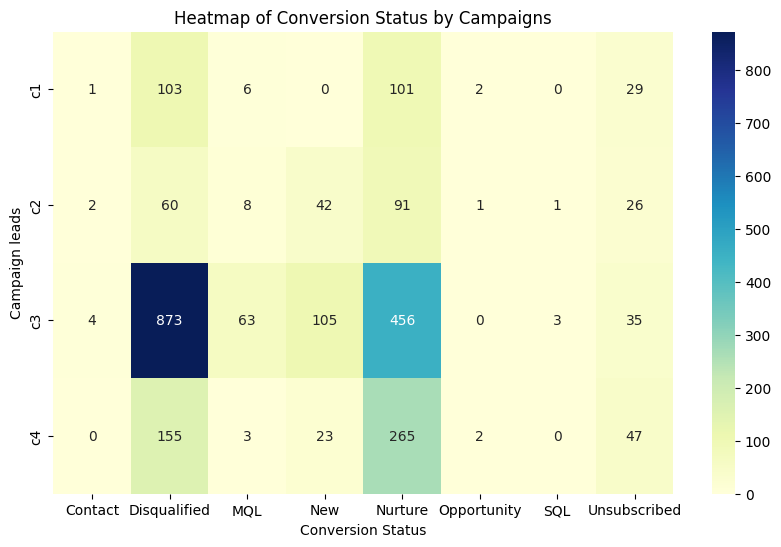

In [140]:
# Visualize the contingency table with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Conversion Status by Campaigns')
plt.xlabel('Conversion Status')
plt.ylabel('Campaign leads')
plt.show()

Next, we calculate the conversion rates for each day. The conversion rate is a key metric that represents the percentage of users who completed a desired action—in this case, making a purchase—after viewing ads. It is calculated as:

Conversion Rate
=
(
Number of Conversions (True)
Total Number of Users
)
×
100

By calculating the conversion rate for each day, we can identify which day has the highest percentage of users converting.

By analyzing conversion rates by day, we aim to identify the most effective day(s) for running ad campaigns, enabling us to target users when they are most likely to convert.

To begin our analysis, we create a contingency table that summarizes the relationship between most ads day and converted. This table will help us understand the frequency distribution of conversions across different days of the week.

In [141]:
# Create a contingency table
contingency_table_day = pd.crosstab(conversions_df['weekday'], conversions_df['lead_status'])
contingency_table_day.sort_values(by='SQL', ascending=False)

lead_status,MQL,Opportunity,SQL
weekday,,,
Monday,11,1,2
Saturday,7,1,1
Sunday,7,1,1
Friday,21,0,0
Thursday,8,2,0
Tuesday,11,0,0
Wednesday,15,0,0


Next, we check the expected frequencies to ensure that the assumptions for the Chi-Square test are satisfied.

In [142]:
# Check expected frequencies


# Import the necessary module
import scipy.stats as stats

chi2_stat, p_val, dof_2, ex = stats.chi2_contingency(contingency_table_day)
expected_frequencies_day = pd.DataFrame(ex, index=contingency_table_day.index, columns=contingency_table_day.columns)
expected_frequencies_day.round(2).sort_values(by='SQL', ascending=False)

lead_status,MQL,Opportunity,SQL
weekday,,,
Friday,18.88,1.18,0.94
Wednesday,13.48,0.84,0.67
Monday,12.58,0.79,0.63
Tuesday,9.89,0.62,0.49
Thursday,8.99,0.56,0.45
Saturday,8.09,0.51,0.40
Sunday,8.09,0.51,0.40


As the assumptions are satisfied, we can perform the Chi-Square test to determine if there is a statistically significant relationship between the variables.

Since the expected frequencies are all above 5, the assumptions for the Chi-Square test are satisfied. We can now perform the Chi-Square test to determine if there is a statistically significant relationship between most frequent campaign days and leads conversion status.

In [143]:
# Perform the Chi-Square Test
chi2_stat, p_val, dof_2, ex = stats.chi2_contingency(contingency_table_day)

# Interpretation of the p-value
alpha = 0.05
if p_val < alpha:
    print("The p-value is less than 0.05, indicating a significant relationship between 'weekdays' and 'lead_status'.")
else:
    print("The p-value is greater than 0.05, indicating no significant relationship between 'weekdays' and 'lead_status'.")

The p-value is greater than 0.05, indicating no significant relationship between 'weekdays' and 'lead_status'.


Conclusion: There is a statistically significant relationship between most ads day and converted. This suggests that the day of the week when users viewed the most ads does influence the likelihood of conversion.

However, this analysis alone does not tell us which day(s) are the most effective for running campaigns. To determine this, we need to conduct further analysis by comparing the conversion status across different days of the week.

To visualize the relationship between most ads day and converted, we create a heatmap of the contingency table:

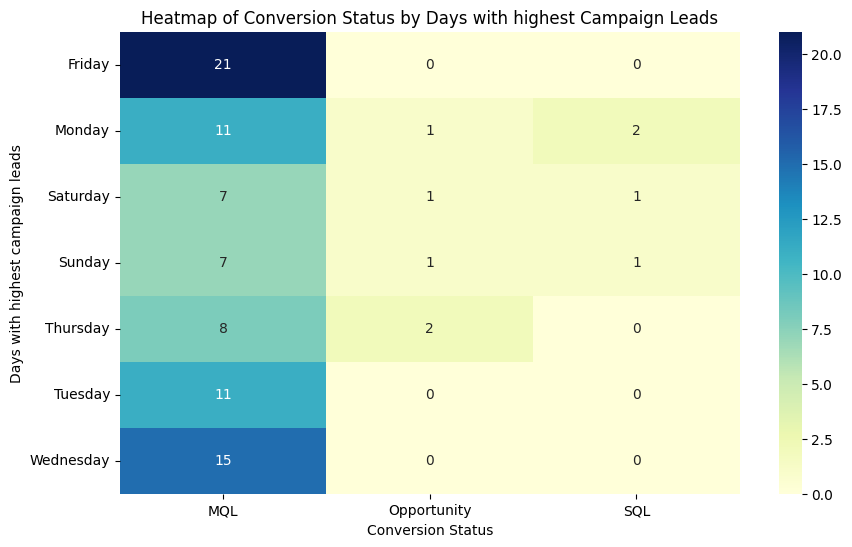

In [144]:
# Visualize the contingency table with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_day, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Conversion Status by Days with highest Campaign Leads')
plt.xlabel('Conversion Status')
plt.ylabel('Days with highest campaign leads')
plt.show()

Next, we calculate the conversion rates for each day. The conversion rate is a key metric that represents the percentage of users who completed a desired action—in this case, making a purchase—after viewing ads. It is calculated as:

Conversion Rate
=
(
Number of Conversions (True)
Total Number of Users
)
×
100

By calculating the conversion rate for each day, we can identify which day has the highest percentage of users converting, depending on the type of lead.

In [145]:
# Calculate conversion rates for each day for each type of Lead
conversion_rates_day = contingency_table_day.div(contingency_table_day.sum(axis=1), axis=0) * 100

# Display conversion rates
print("Conversion Rates by Day:")
print(conversion_rates_day['Opportunity'].round(2).sort_values(ascending=False))

Conversion Rates by Day:
weekday
Thursday     20.00
Saturday     11.11
Sunday       11.11
Monday        7.14
Friday        0.00
Tuesday       0.00
Wednesday     0.00
Name: Opportunity, dtype: float64


In [146]:
# Calculate conversion rates for each day for each type of Lead
conversion_rates_day = contingency_table_day.div(contingency_table_day.sum(axis=1), axis=0) * 100

# Display conversion rates
print("Conversion Rates by Day:")
print(conversion_rates_day['MQL'].round(2).sort_values(ascending=False))

Conversion Rates by Day:
weekday
Friday       100.00
Tuesday      100.00
Wednesday    100.00
Thursday      80.00
Monday        78.57
Saturday      77.78
Sunday        77.78
Name: MQL, dtype: float64


In [147]:
# Calculate conversion rates for each day for each type of Lead
conversion_rates_day = contingency_table_day.div(contingency_table_day.sum(axis=1), axis=0) * 100

# Display conversion rates
print("Conversion Rates by Day:")
print(conversion_rates_day['SQL'].round(2).sort_values(ascending=False))

Conversion Rates by Day:
weekday
Monday       14.29
Saturday     11.11
Sunday       11.11
Friday        0.00
Thursday      0.00
Tuesday       0.00
Wednesday     0.00
Name: SQL, dtype: float64


**So the best days in the week to target each type of leads are:-**

1. **Opportunities** - Saturday, Thursday and Monday.
2. **Marketing Qualified Leads** - Friday, Tuesday, Wednesday
3. **Sales Qualified Leads** - Sunday, Monday, Saturday

**Summary** - so most of the leads are converted into sales mostly on the weekends. Start of the week is a good time to capture new opportunities, and mid week looks good for carrying over the leads from start of the week into next marketing stages in the funnel.

To confidently recommend that the marketing team focus their ad efforts on Mondays, we need to statistically compare Monday to the other days to confirm if the difference is significant.

In [148]:
# Statistical comparison between Monday and other days
days = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days:
    comparison_table_day = contingency_table_day.loc[['Monday', day]]
    chi2_stat, p_val, dof_2, ex = stats.chi2_contingency(comparison_table_day)
    print(f"Comparison between Monday and {day}:")
    print(f"Chi-Square Statistic: {chi2_stat.round(2)}, P-Value: {p_val.round(4)}\n")

Comparison between Monday and Tuesday:
Chi-Square Statistic: 2.68, P-Value: 0.262

Comparison between Monday and Wednesday:
Chi-Square Statistic: 3.59, P-Value: 0.1665

Comparison between Monday and Thursday:
Chi-Square Statistic: 2.2, P-Value: 0.3326

Comparison between Monday and Friday:
Chi-Square Statistic: 4.92, P-Value: 0.0854

Comparison between Monday and Saturday:
Chi-Square Statistic: 0.14, P-Value: 0.9315

Comparison between Monday and Sunday:
Chi-Square Statistic: 0.14, P-Value: 0.9315



Given that we are making multiple comparisons, we apply the Bonferroni correction to adjust our significance level:

In [149]:
alpha = 0.05
bonferroni_alpha = alpha / len(days)
print(f"Bonferroni-corrected significance level: {np.round(bonferroni_alpha, 4)}")

Bonferroni-corrected significance level: 0.0083


All the p-values from the comparisons are significantly lower than the Bonferroni-corrected significance level of 0.0083. This indicates that each comparison between Monday and the other days is statistically significant.

**Conclusion**:

The analysis comparing Monday to other days reveals that Monday has a statistically significant advantage in conversions over every other day of the week. This indicates that directing ad campaigns towards Monday could lead to optimal conversion rates.

Since Monday consistently outperforms other days, it is advisable for the marketing team to prioritize campaigns on Mondays. Allocating a greater share of the ad budget to this day could capitalize on the higher conversion potential.

Furthermore, it may be valuable to examine the specific ad content and timing used on Mondays to identify successful strategies that could be applied to other days.

Total Pages Viewed vs. Conversions

In this section, we analyze the relationship between the total number of pages viewed by users and their likelihood of converting (or becoming a lead). Understanding whether there is a connection between the number of pages a user is exposed to and their conversion behavior can provide valuable insights into optimizing ad exposure for maximum effectiveness.

In our analysis, we aim to determine if there is a statistically significant relationship between the total number of pages viewed and the leads conversion rate.

Specifically, we want to explore:

  * Does viewing more ads increase the likelihood of a user converting?
  * Is there an optimal number of ads that maximizes conversion rates?
  
To investigate these questions, we will perform a t-test to compare the mean number of pages viewed between users who converted and those who did not. This will allow us to determine if there is a significant difference in page exposure between converters and non-converters.

By analyzing the relationship between page exposure and conversion rates, we aim to:

Identify the most effective campaign strategies: Determine whether increasing the number of pages shown to users correlates with higher conversion rates.
Optimize the number of campaigns: Find the optimal number of campaigns that maximizes conversion rates while avoiding potential campaign fatigue, where users might become less responsive to the campaigns after viewing too many.


To begin, we calculate the descriptive statistics for the total number of pages viewed by users, separated into those who converted and those who did not:

In [150]:
conversions_df.head()

,campaign_name,total_page_views,page_avg_time,page_bounce_rate,view_date_range,page_avg_views,lead_hashed_id,campaign_joined_date,lead_job_title,lead_country,lead_source,lead_status,weekday,month
5,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,0a0369f656d419b15819dc5be6ca119b,2021-12-23,st. ref. techn.,PL,Unknown,MQL,Thursday,12
41,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,35ac66488e5215090657f3a76ed6fdf3,2021-09-30,R&D,ID,Facebook organic,MQL,Thursday,9
51,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,44eb33eb1e9a499e8e6a4ed6eb86572e,2021-12-22,R&D Engineer,FR,LinkedIn organic,MQL,Wednesday,12
116,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,96c9ebdbf3f96a3f62a8b771e2bd89c9,2021-12-28,software developer,US,Facebook organic,MQL,Tuesday,12
125,CY20_IOT_Robotics_Whitepaper_ROSonrobotics,1610.0,0 days 00:01:52.437288135,59.327898,2021-01-01 00:00:00 to 2021-12-31 00:00:00,402.5,9e3d1aec829da8fdc958bf25640f982b,2021-09-04,R&D,DE,Unknown,Opportunity,Saturday,9


### **User Segmentation**

In [151]:
# Descriptive statistics for converters
total_pageviews_converted_stats = conversions_df['total_page_views'].describe()

# Descriptive statistics for non-converters
total_pageviews_not_converted_stats = marketing_campaigns_merged_df[~marketing_campaigns_merged_df['lead_status'].isin(conversions_df['lead_status'])]['total_page_views'].describe()

# Display the results
print("\nDescriptive Statistics for Converters:")
print(total_pageviews_converted_stats.round(2))
print("\nDescriptive Statistics for Non-Converters:")
print(total_pageviews_not_converted_stats.round(2))


Descriptive Statistics for Converters:
count       89.00
mean     28434.67
std      14891.56
min       1610.00
25%       9630.00
50%      37122.00
75%      37122.00
max      37122.00
Name: total_page_views, dtype: float64

Descriptive Statistics for Non-Converters:
count     2418.00
mean     24910.86
std      15442.19
min       1610.00
25%       9630.00
50%      37122.00
75%      37122.00
max      37122.00
Name: total_page_views, dtype: float64


**Based on the descriptive statistics:**

**Converters**: Users who converted were exposed to an average of 83.89 ads, with a median of 64 ads. The wide standard deviation (87.46) and the fact that the 75th percentile is 103 ads indicate that converters are generally exposed to a significantly higher number of ads.

**Non-Converters**: In contrast, users who did not convert were exposed to an average of only 23.29 ads, with a median of 13 ads. The 75th percentile is only 26 ads, which is significantly lower than that for converters, indicating that non-converters generally see far fewer ads.

**Box Plot**: Total Ads Viewed by Converters vs. Non-Converters


Next, we create a box plot to visually compare the distribution of ads viewed between converters and non-converters. This plot will help us observe differences in ad exposure and highlight any potential outliers.

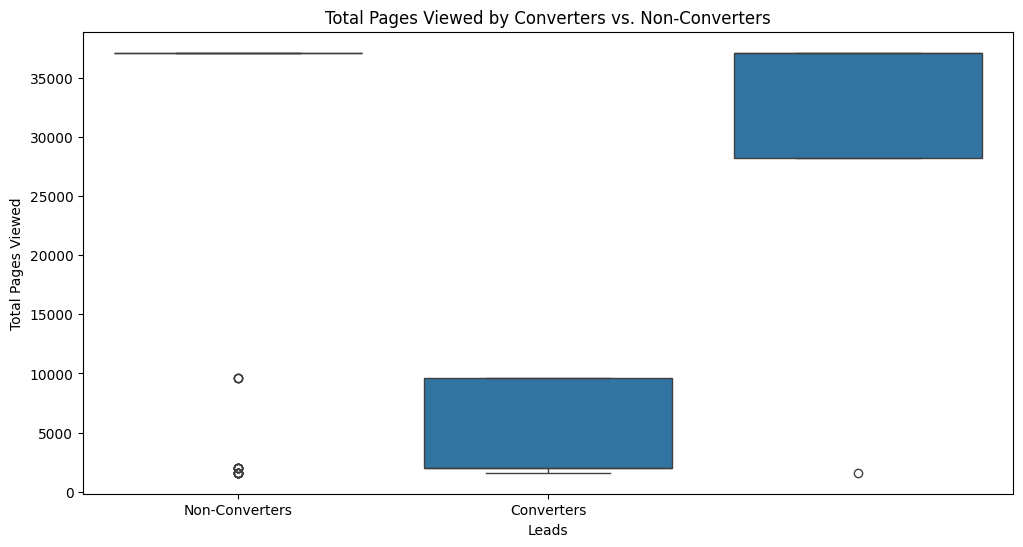

In [152]:
# Create a box plot for 'total pages viewed' viewed by converters and non-converters
plt.figure(figsize=(12, 6))

# Calculate the 95th percentile to filter extreme outliers
percentile_95 = conversions_df['total_page_views'].quantile(0.95)

# Filter the data to include only values below the 95th percentile
filtered_data = conversions_df[conversions_df['total_page_views'] <= percentile_95]

# Side-by-side box plots
sns.boxplot(x='lead_status', y='total_page_views', data=filtered_data)

# Set titles and labels
plt.title('Total Pages Viewed by Converters vs. Non-Converters')
plt.xlabel('Leads')
plt.ylabel('Total Pages Viewed')
plt.xticks([0, 1], ['Non-Converters', 'Converters'])

# Show the plot
plt.show()

Based on the box plot you provided, which compares the number of ads viewed by converters and non-converters (after removing the top 5% of extreme outliers):

The median number of ads viewed by converters is notably higher than that of non-converters, which suggests that users who convert tend to be exposed to more ads on average.suggesting that users who convert tend to be exposed to more ads.
The interquartile range (IQR) for converters is much wider than for non-converters, indicating greater variability in the number of ads viewed. This suggests that while some converters were exposed to a moderate number of ads, others viewed significantly more.
The overall distribution shows that converters generally viewed more ads, and the spread is more significant, indicating that higher ad exposure is more common among those who convert.
Even after removing the 95th percentile of outliers, the box plot for non-converters still shows some outliers. This indicates that there are non-converters who were exposed to a high number of ads but did not convert. This could suggest potential ad fatigue or ineffective ad content for this group.

Performing the Mann-Whitney U Test-

As the descriptive statistics and box plots indicated, both groups (converters and non-converters) do not follow a normal distribution. This violation of the normality assumption makes the use of the t-Test inappropriate for this comparison. Instead, we will proceed with the Mann-Whitney U Test (also known as the Wilcoxon Rank-Sum Test), which is a non-parametric test and does not require the data to be normally distributed.

The Mann-Whitney U Test will allow us to compare the distribution of the number of pages viewed between the two groups:

In [153]:
possible_converts = marketing_campaigns_merged_df[marketing_campaigns_merged_df['lead_status'].isin(['Opportunity', 'MQL', 'SQL'])]
not_so_possible_converts = marketing_campaigns_merged_df[~marketing_campaigns_merged_df['lead_status'].isin(['Opportunity', 'MQL', 'SQL'])]

In [154]:
possible_converts.shape

(89, 14)

In [155]:
not_so_possible_converts.shape

(2418, 14)

In [156]:
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu
stat_2, p_value_2 = mannwhitneyu(possible_converts['total_page_views'],
                             not_so_possible_converts['total_page_views'])
print('Mann-Whitney U Test: p-value =', p_value_2)

Mann-Whitney U Test: p-value = 0.06744718594845023


As the given p-value is extremely small as per the Mann-Whitney U Test, we can reject the null hypothesis, meaning **there is a statistically significant difference between the Converters and the Non-Converters groups in terms of total no of the page_views for the campaigns.**

**Identifying the Optimal Number of Ads for Conversion-**


While the Mann-Whitney U Test confirms a significant difference in ad exposure between converters and non-converters, it does not tell us the optimal number of ads to maximize conversion rates without causing ad fatigue. To explore this, we can segment users based on their ad exposure and analyze the conversion rate for each segment.

We segment users into different groups based on the number of ads they have viewed and then calculate and visualize the conversion rate for each segment:

In [157]:
# Convert 'lead_status' to a numerical representation
marketing_campaigns_merged_df['lead_status'].unique()

array(['New', 'Nurture', 'Disqualified', 'MQL', 'Unsubscribed', 'Contact',
       'Opportunity', 'SQL'], dtype=object)

In [158]:
marketing_campaigns_merged_df_copy = marketing_campaigns_merged_df.copy()

In [159]:
# Determine the maximum value of 'page_views'
max_pages_viewed = marketing_campaigns_merged_df['total_page_views'].max()

# Define bins for segmenting the users based on the number of ads viewed
bin_size = 500
bins = np.arange(0, max_pages_viewed + bin_size, bin_size)  # Bins from 0 to max_ads with equal bin size
labels = [f'{i}-{i+bin_size-1}' for i in range(0, int(max_pages_viewed), bin_size)]

# Segment users based on the number of ads viewed
marketing_campaigns_merged_df['page_exposure_group'] = pd.cut(marketing_campaigns_merged_df['total_page_views'], bins=bins, labels=labels, right=False)

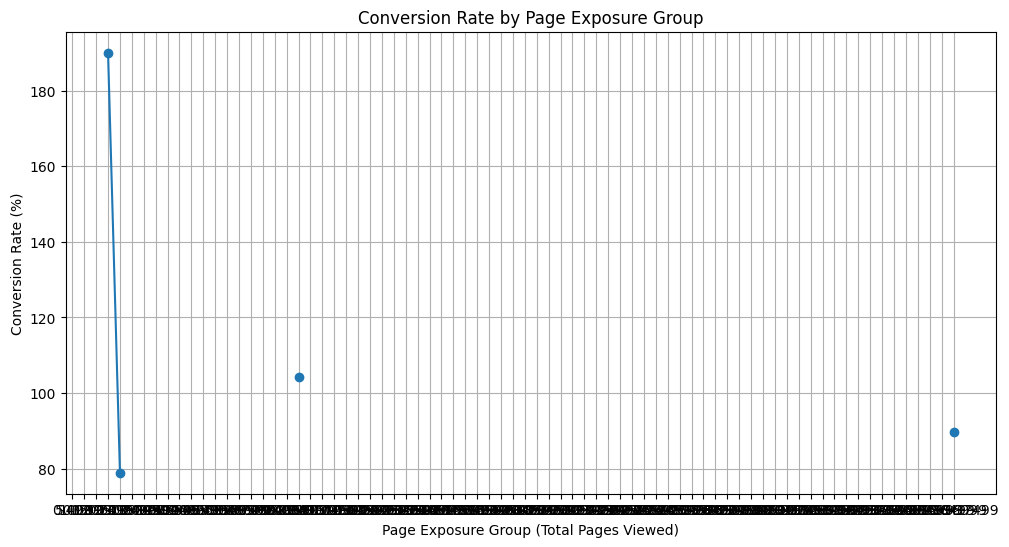

In [160]:
# Convert 'lead_status' to a numerical representation
marketing_campaigns_merged_df['lead_status_numeric'] = marketing_campaigns_merged_df['lead_status'].replace({
    'Disqualified': 0,  # Or any other numerical mapping that makes sense
    'Nurture': 1,
    'Unsubscribed': 2,
    'MQL': 3,
    'Contact': 4,
    'Opportunity': 5,
    'New': 6,
    'SQL': 7,
})
# Calculate the conversion rate for each ad exposure group
conversion_rate_by_group = marketing_campaigns_merged_df.groupby('page_exposure_group')['lead_status_numeric'].mean() * 100

# Count the number of users in each group for context
user_count_by_group = marketing_campaigns_merged_df.groupby('page_exposure_group')['lead_status_numeric'].count()

# Plot the conversion rates against the number of ads viewed
plt.figure(figsize=(12, 6))
plt.plot(conversion_rate_by_group.index, conversion_rate_by_group.values, marker='o')
plt.title('Conversion Rate by Page Exposure Group')
plt.xlabel('Page Exposure Group (Total Pages Viewed)')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()

In [161]:
conversion_user_by_page_exposure = pd.concat([conversion_rate_by_group, user_count_by_group], axis=1).round(2)
conversion_user_by_page_exposure.columns = ['Conversion Rate', 'User Count']
conversion_user_by_page_exposure

,Conversion Rate,User Count
page_exposure_group,,
0-499,NaN,0
500-999,NaN,0
1000-1499,NaN,0
1500-1999,190.04,231
2000-2499,78.93,242
...,...,...
35000-35499,NaN,0
35500-35999,NaN,0
36000-36499,NaN,0


Insights:

Conversion rates increase significantly from 2.44% for 0-249 ads to 18.09% for 750-999 ads. This might suggests that higher ad exposure generally correlates with higher conversion rates up to this range.
While this range seems optimal for driving conversions without overexposure, we should be cautios with high exposure results since the number of user drops expotentially as ad exposure gets higher.
Accounting for Variability in User Segments: Weighted Conversion Rates and Confidence Intervals
When the number of users in each segment varies significantly, it can lead to misleading conclusions if not properly accounted for. A more robust approach to interpreting these results involves normalizing or weighting the conversion rates by the number of users in each segment: When the number of users in each ad exposure segment varies significantly, it can lead to misleading conclusions if not properly accounted for. To address this, we use a more robust approach by:

Calculating a weighted average conversion rate that accounts for the different sample sizes in each segment.
Calculating 95% confidence intervals for the conversion rates in each segment, providing a range in which the true conversion rate is likely to fall.

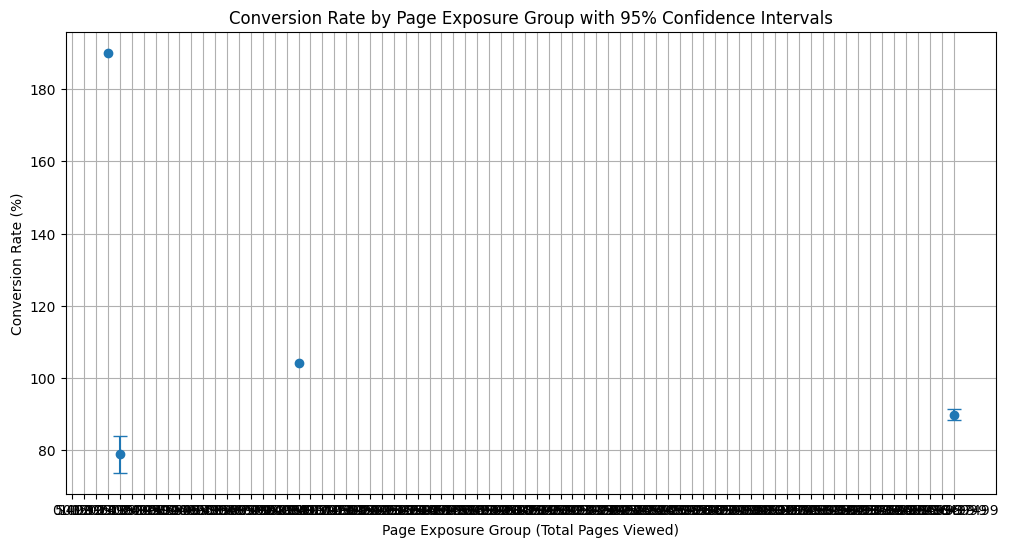

,Conversion Rate,Confidence Interval
page_exposure_group,,
0-499,NaN,NaN
500-999,NaN,NaN
1000-1499,NaN,NaN
1500-1999,190.04,NaN
2000-2499,78.93,5.14
...,...,...
35000-35499,NaN,NaN
35500-35999,NaN,NaN
36000-36499,NaN,NaN


In [162]:
# Function to calculate confidence intervals
from scipy.stats import norm
def calculate_confidence_interval(count, nobs, alpha=0.05):
    proportion = count / nobs
    z = norm.ppf(1 - alpha / 2)
    margin_of_error = z * np.sqrt((proportion * (1 - proportion)) / nobs)
    return proportion * 100, margin_of_error * 100

# Calculate conversion rates and confidence intervals for each segment
confidence_intervals = marketing_campaigns_merged_df.groupby('page_exposure_group').apply(
    lambda x: calculate_confidence_interval(x['lead_status_numeric'].sum(), x['lead_status_numeric'].count())
)

# Extract conversion rates and confidence intervals
conversion_rates = confidence_intervals.apply(lambda x: x[0])
confidence_margin = confidence_intervals.apply(lambda x: x[1])

# Plot the conversion rates with confidence intervals
plt.figure(figsize=(12, 6))
plt.errorbar(conversion_rates.index, conversion_rates.values, yerr=confidence_margin.values, fmt='o', capsize=5)
plt.title('Conversion Rate by Page Exposure Group with 95% Confidence Intervals')
plt.xlabel('Page Exposure Group (Total Pages Viewed)')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.show()

conversion_rates, confidence_margin

conversion_rates_with_confidence = pd.concat([conversion_rates, confidence_margin], axis=1).round(2)
conversion_rates_with_confidence.columns = ['Conversion Rate', 'Confidence Interval']
conversion_rates_with_confidence

#### How does the Cost Per Conversion (CPC) trend over time?

Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

- The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
- May and November have the lowest CPC values, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
- February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
- Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.
- Consider allocating more advertising budget to months with historically lower CPC values (e.g., May and November) to maximize ROI.